In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime
import cmocean

In [2]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  

In [3]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [4]:
O2_SSP126_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [5]:
O2_SSP245_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [6]:
O2_SSP585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [7]:
O2_SSP126_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15681,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Omon,o2,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [8]:
o2sat_ssp126_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [9]:
o2sat_ssp245_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [10]:
o2sat_ssp585_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [11]:
o2sat_ssp126_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15679,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Omon,o2sat,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [43]:
gcs = gcsfs.GCSFileSystem(token='anon')
#datasets for O2
zstore_O2_SSP126_data = O2_SSP126_data.zstore.values[-1]
zstore_O2_SSP245_data = O2_SSP245_data.zstore.values[-1]
zstore_O2_SSP585_data = O2_SSP585_data.zstore.values[-1]

In [44]:
# create a mutable-mapping-style interface to the store
mapper_O2_SSP126 = gcs.get_mapper(zstore_O2_SSP126_data)
# open the dataset using xarray and zarr
O2_SSP126 = xr.open_zarr(mapper_O2_SSP126, 
                                consolidated=True,use_cftime=True).o2#.rename({'lat':'latitude',
                                                             #'lon':'longitude'})
mapper_O2_SSP245 = gcs.get_mapper(zstore_O2_SSP245_data)
O2_SSP245 = xr.open_zarr(mapper_O2_SSP245, 
                                consolidated=True,use_cftime=True).o2#.rename({'lat':'latitude',
                                                            # 'lon':'longitude'})
mapper_O2_SSP585 = gcs.get_mapper(zstore_O2_SSP585_data)
O2_SSP585 = xr.open_zarr(mapper_O2_SSP585, 
                                consolidated=True,use_cftime=True).o2#.rename({'lat':'latitude',
                                                            # 'lon':'longitude'})


In [45]:
O2_SSP126

<xarray.DataArray 'o2' (time: 1032, lev: 35, lat: 180, lon: 360)>
dask.array<open_dataset-o2, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration
    original_name:  o2
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

In [46]:
zstore_o2sat_ssp126 = o2sat_ssp126_data.zstore.values[-1]
zstore_o2sat_ssp245 = o2sat_ssp245_data.zstore.values[-1]
zstore_o2sat_ssp585 = o2sat_ssp585_data.zstore.values[-1]

In [47]:
mapper_o2sat_ssp126 = gcs.get_mapper(zstore_o2sat_ssp126)
O2_sat_SSP126 = xr.open_zarr(mapper_o2sat_ssp126, 
                                consolidated=True,use_cftime=True).o2sat#.rename({'lat':'latitude',
                                                            # 'lon':'longitude'})
mapper_o2sat_ssp245 = gcs.get_mapper(zstore_o2sat_ssp245)
O2_sat_SSP245 = xr.open_zarr(mapper_o2sat_ssp245, 
                                consolidated=True,use_cftime=True).o2sat#.rename({'lat':'latitude',
                                                             #'lon':'longitude'})
mapper_o2sat_ssp585 = gcs.get_mapper(zstore_o2sat_ssp585)
O2_sat_SSP585 = xr.open_zarr(mapper_o2sat_ssp585, 
                                consolidated=True,use_cftime=True).o2sat#.rename({'lat':'latitude',
                                                             #'lon':'longitude'})

In [42]:
#difference plots for 02
diff_O2_SSP126=(O2_SSP126.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_SSP126.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

diff_O2_SSP245=(O2_SSP245.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_SSP245.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

diff_O2_SSP585=(O2_SSP585.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_SSP585.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

#difference plots for 02sat
diff_O2sat_SSP126=(O2_sat_SSP126.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_sat_SSP126.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

diff_O2sat_SSP245=(O2_sat_SSP245.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_sat_SSP245.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

diff_O2sat_SSP585=(O2_sat_SSP585.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_sat_SSP585.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

In [20]:
O2_sat_SSP126

<xarray.DataArray 'o2sat' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-o2sat, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(15, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration at Saturation
    original_name:  o2sat
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

Text(0.5, 1.0, 'Difference in Dissolved Oxygen Content for SSP126 at SS')

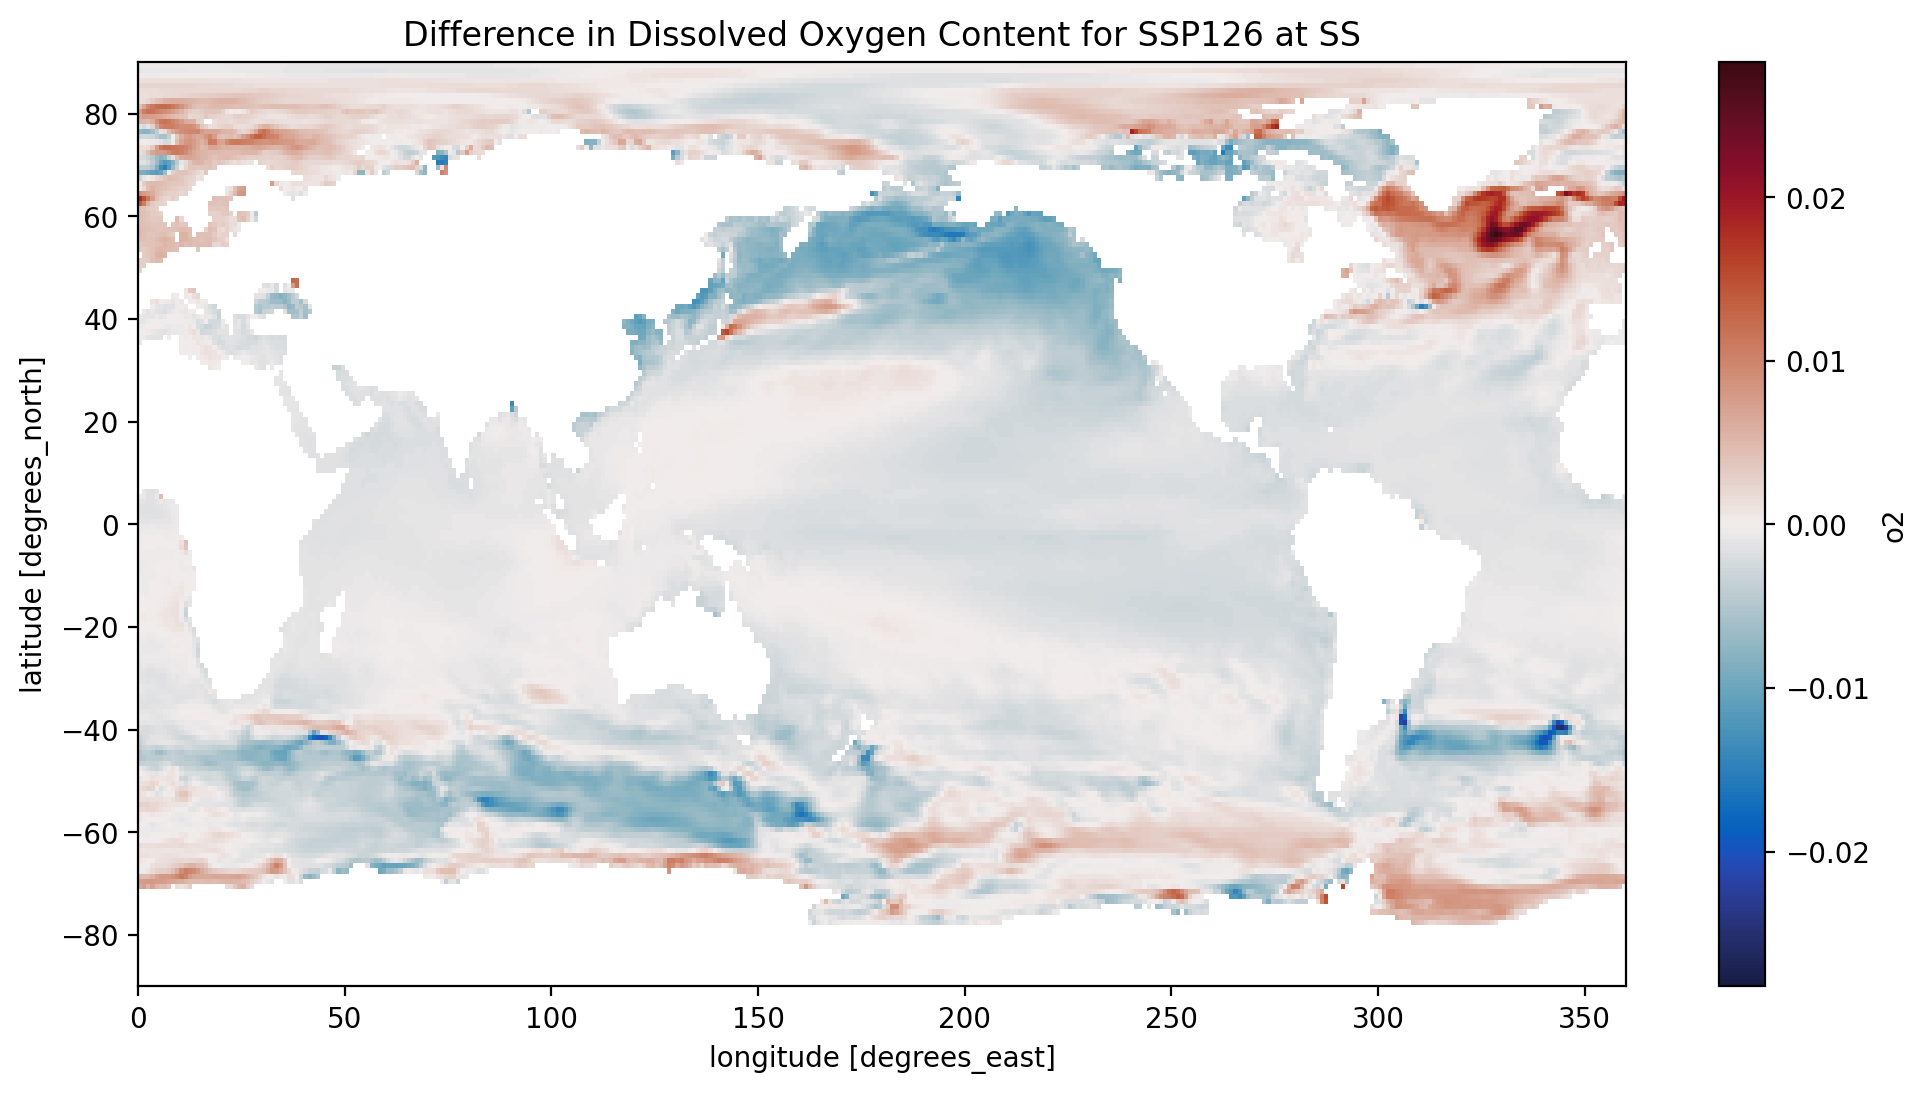

In [57]:
diff_126_O2_Surface = diff_O2_SSP126.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Difference in Dissolved Oxygen Content for SSP126 at SS')

Text(0.5, 1.0, 'Difference in Dissolved Oxygen Content for SSP245 at SS')

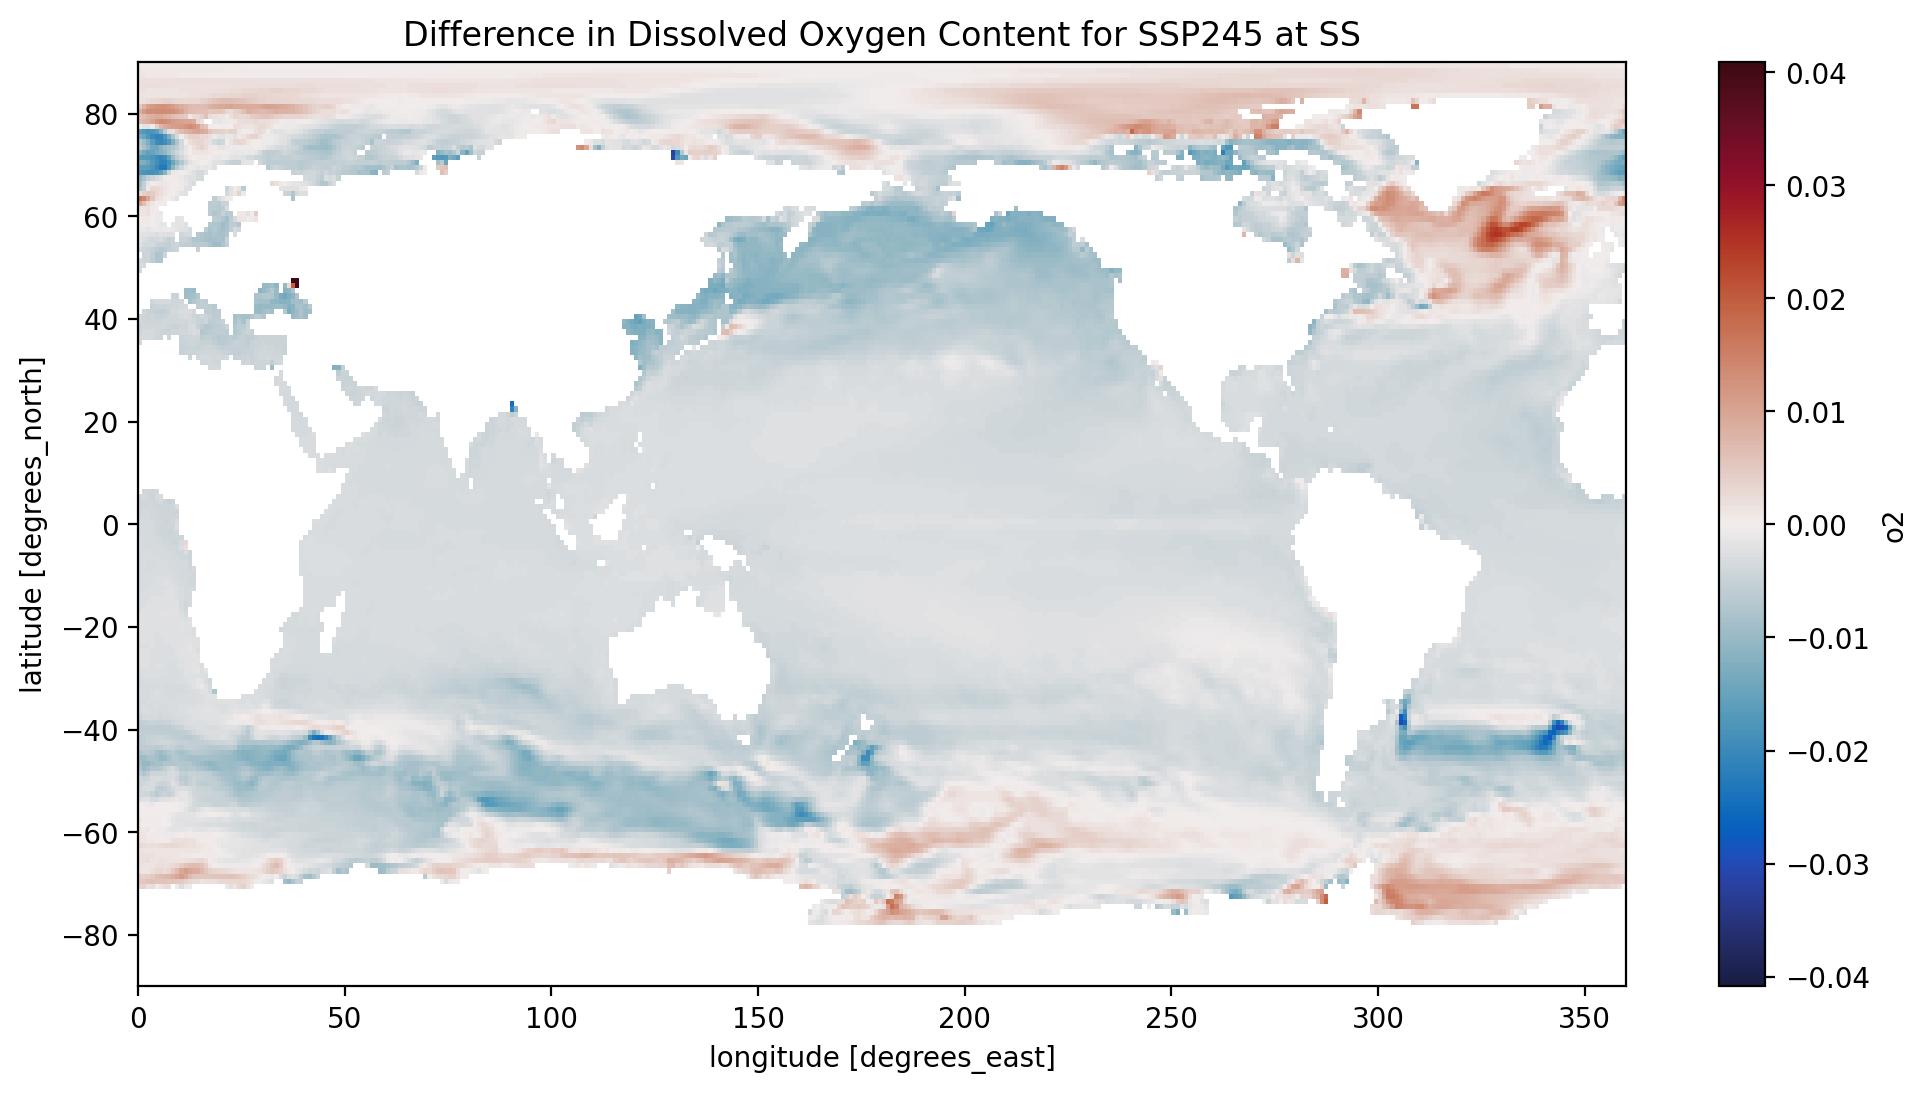

In [66]:
diff_245_O2_Surface = diff_O2_SSP245.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Difference in Dissolved Oxygen Content for SSP245 at SS')

Text(0.5, 1.0, 'Difference in Dissolved Oxygen Content for SSP585 at SS')

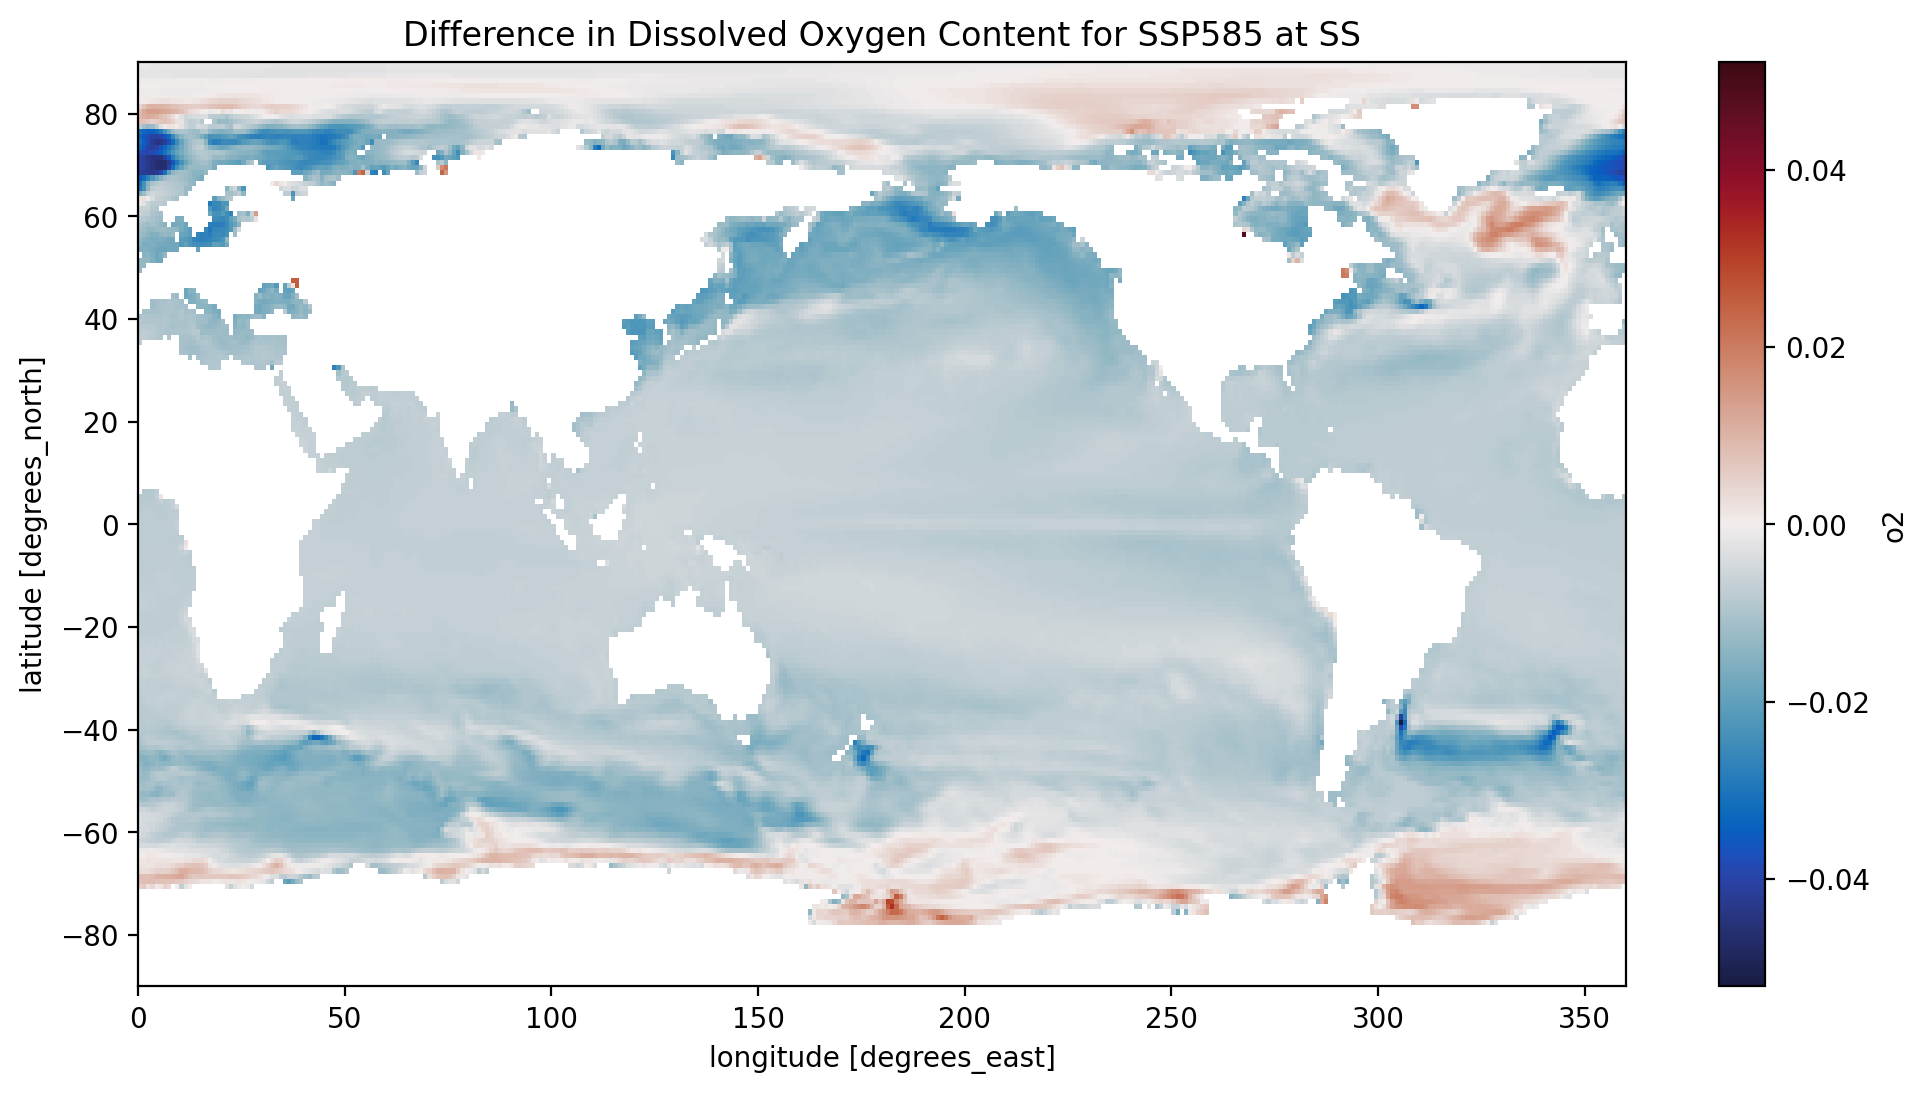

In [67]:
diff_585_O2_Surface = diff_O2_SSP585.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Difference in Dissolved Oxygen Content for SSP585 at SS')

Text(0.5, 1.0, 'Zonal Average of Dissolved Oxygen Content for SSP126')

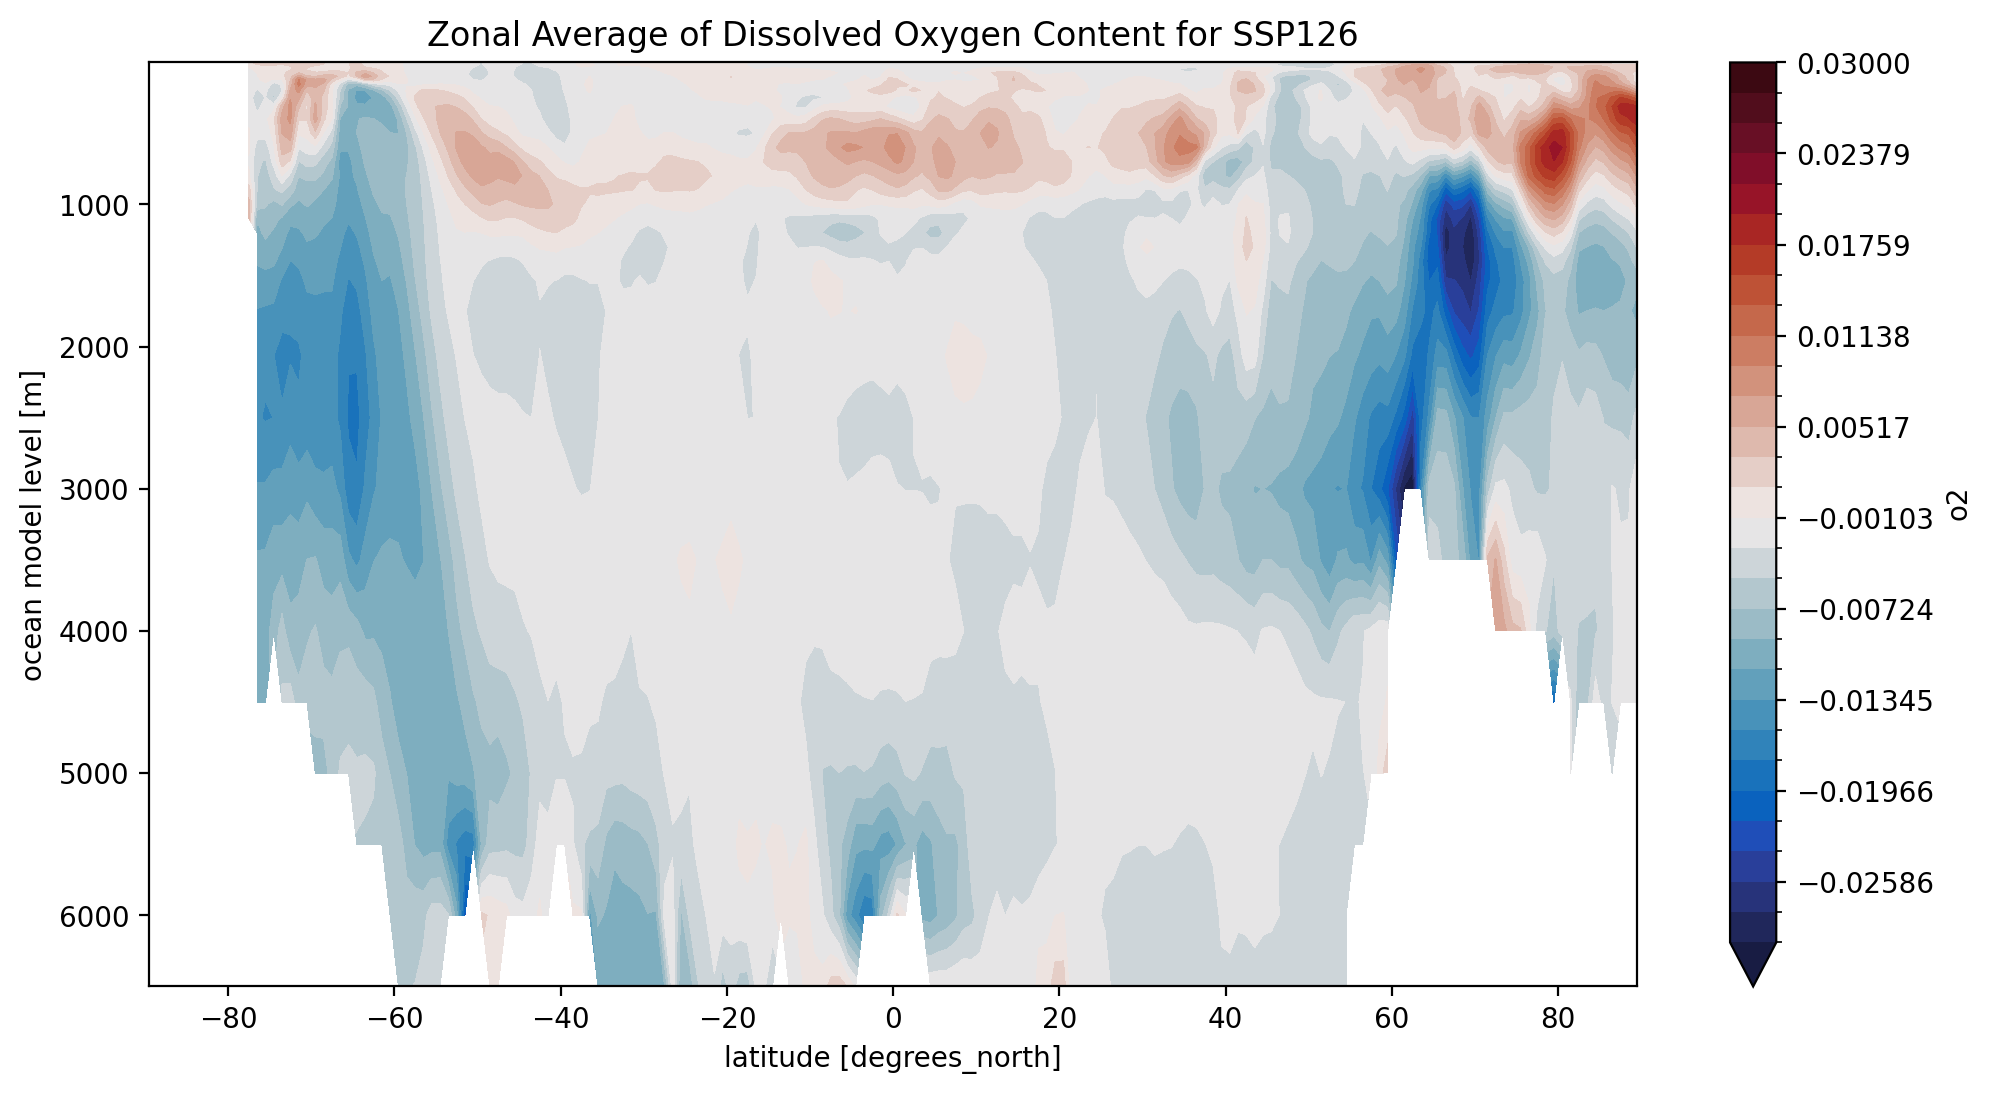

In [81]:
zd_126_02= diff_O2_SSP126.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, vmin=-0.03,vmax=0.03, levels=30)
plt.title('Zonal Average of Dissolved Oxygen Content for SSP126')

Text(0.5, 1.0, 'Zonal Average of Dissolved Oxygen Content for SSP245')

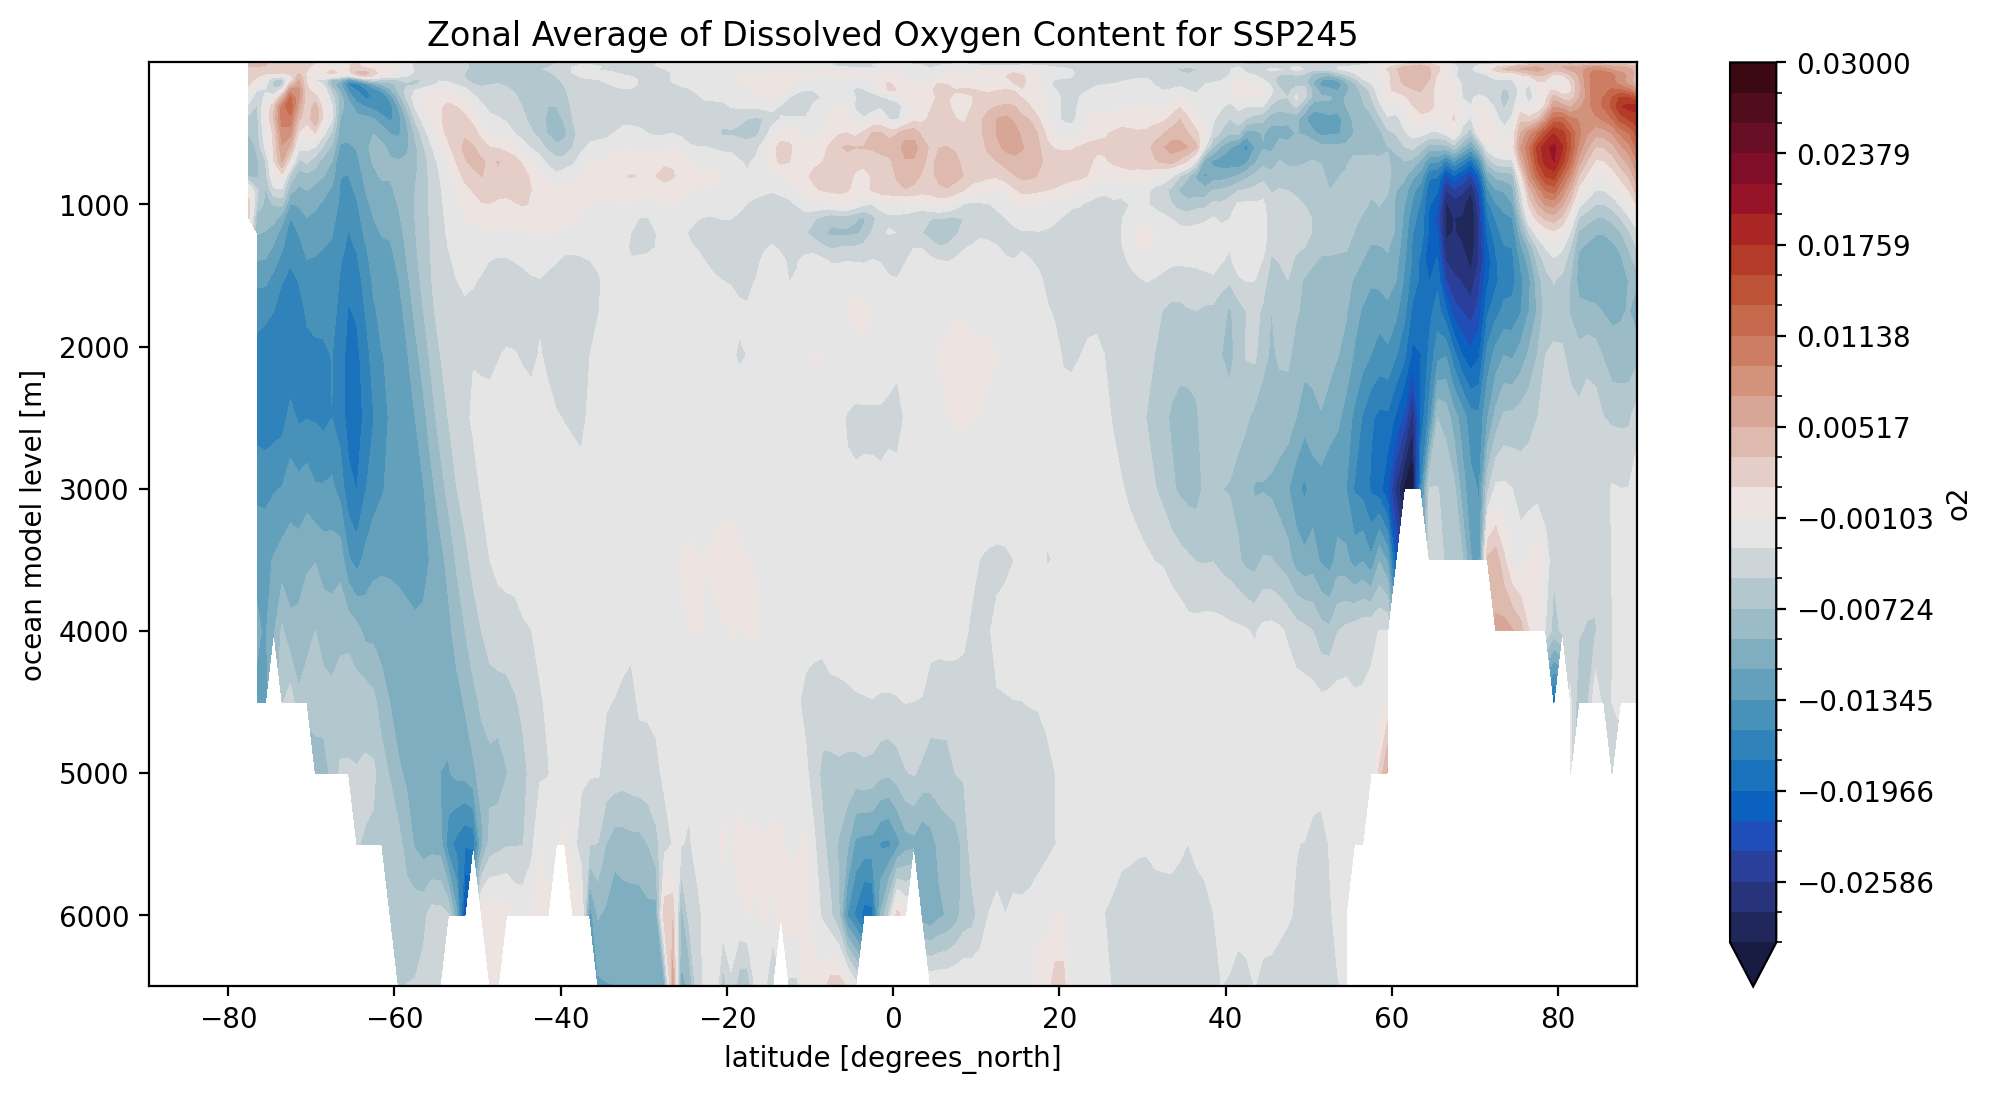

In [82]:
zd_245_02= diff_O2_SSP245.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, vmin=-0.03,vmax=0.03,levels=30)
plt.title('Zonal Average of Dissolved Oxygen Content for SSP245')

Text(0.5, 1.0, 'Zonal Average of Dissolved Oxygen Content for SSP585')

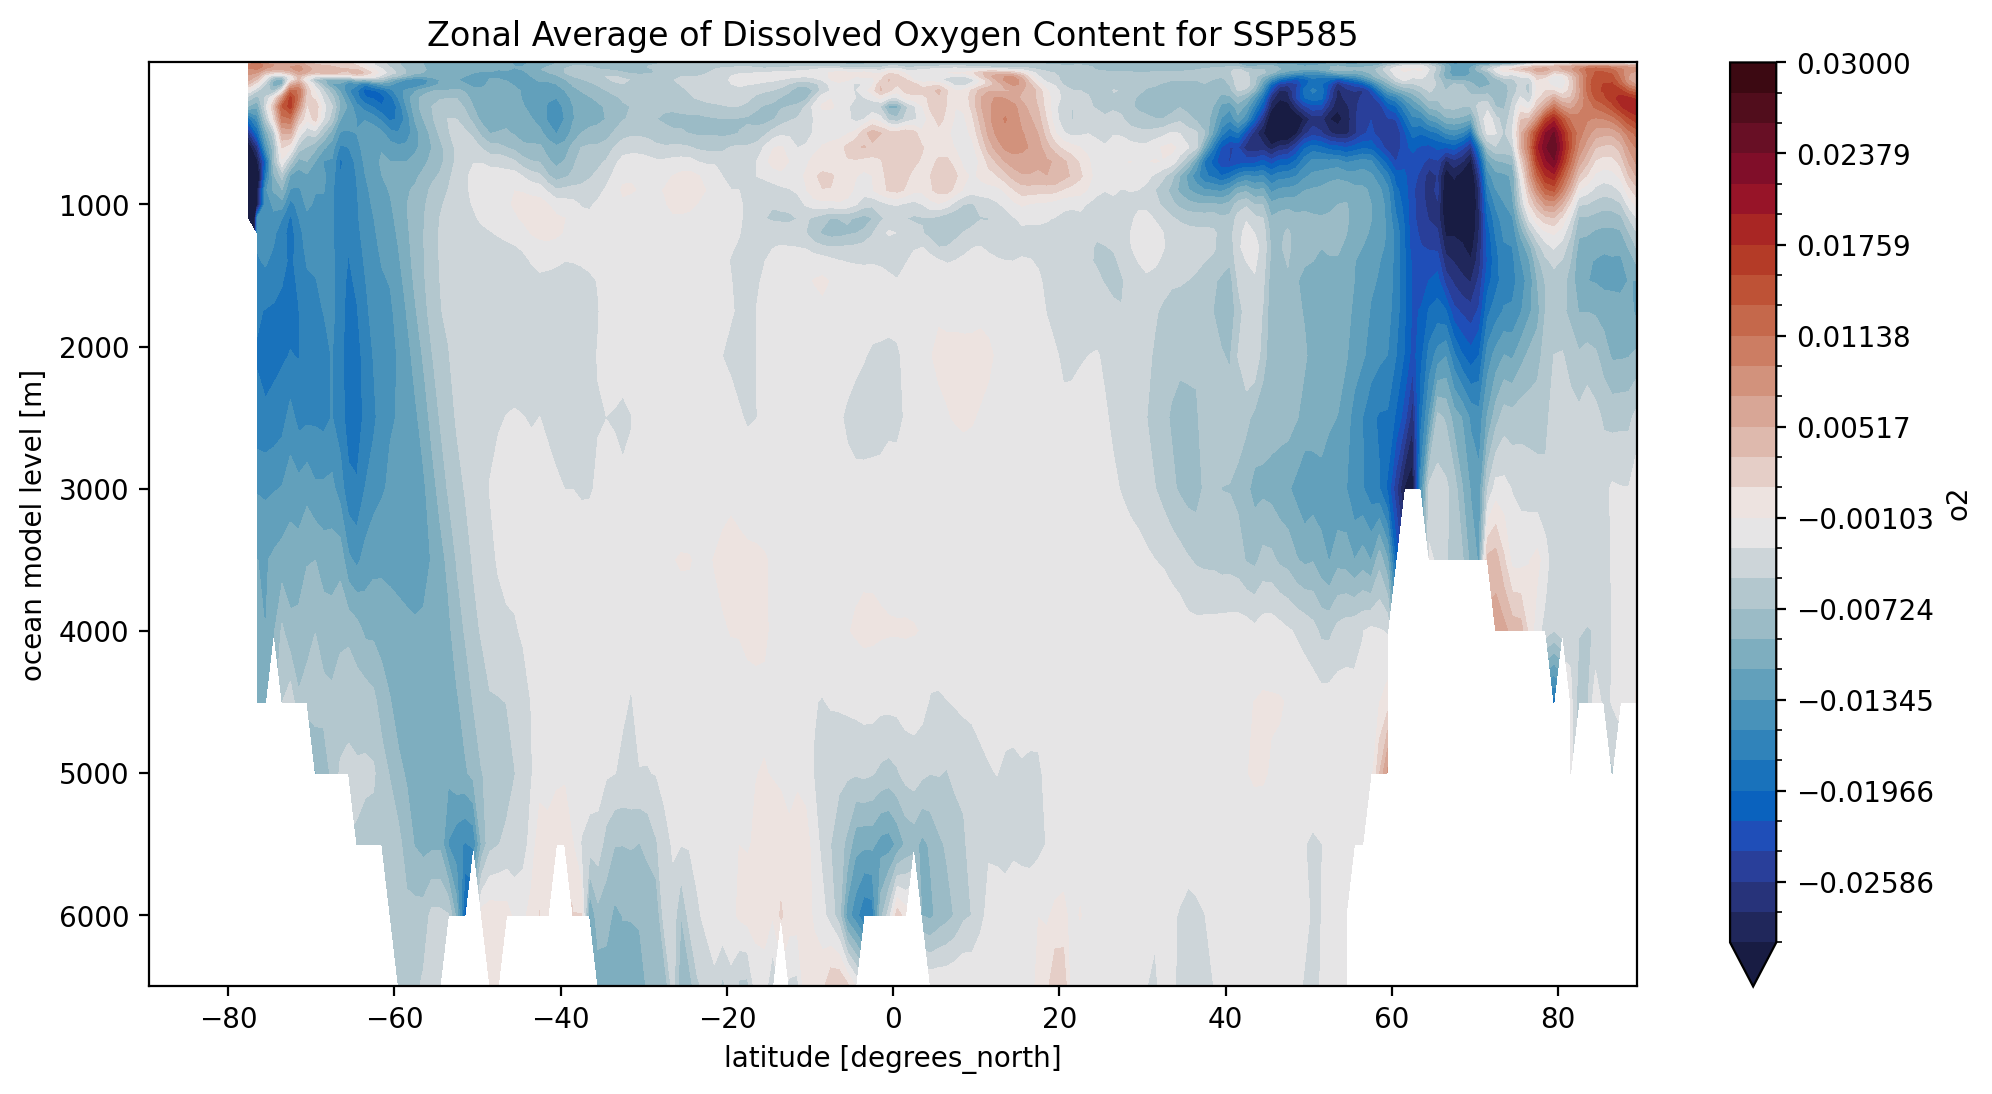

In [83]:
zd_585_02= diff_O2_SSP585.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, vmin=-0.03,vmax=0.03,levels=30)
plt.title('Zonal Average of Dissolved Oxygen Content for SSP585')

Text(0.5, 1.0, 'Difference in Dissolved Oxygen Content at Saturation for SSP126 at SS')

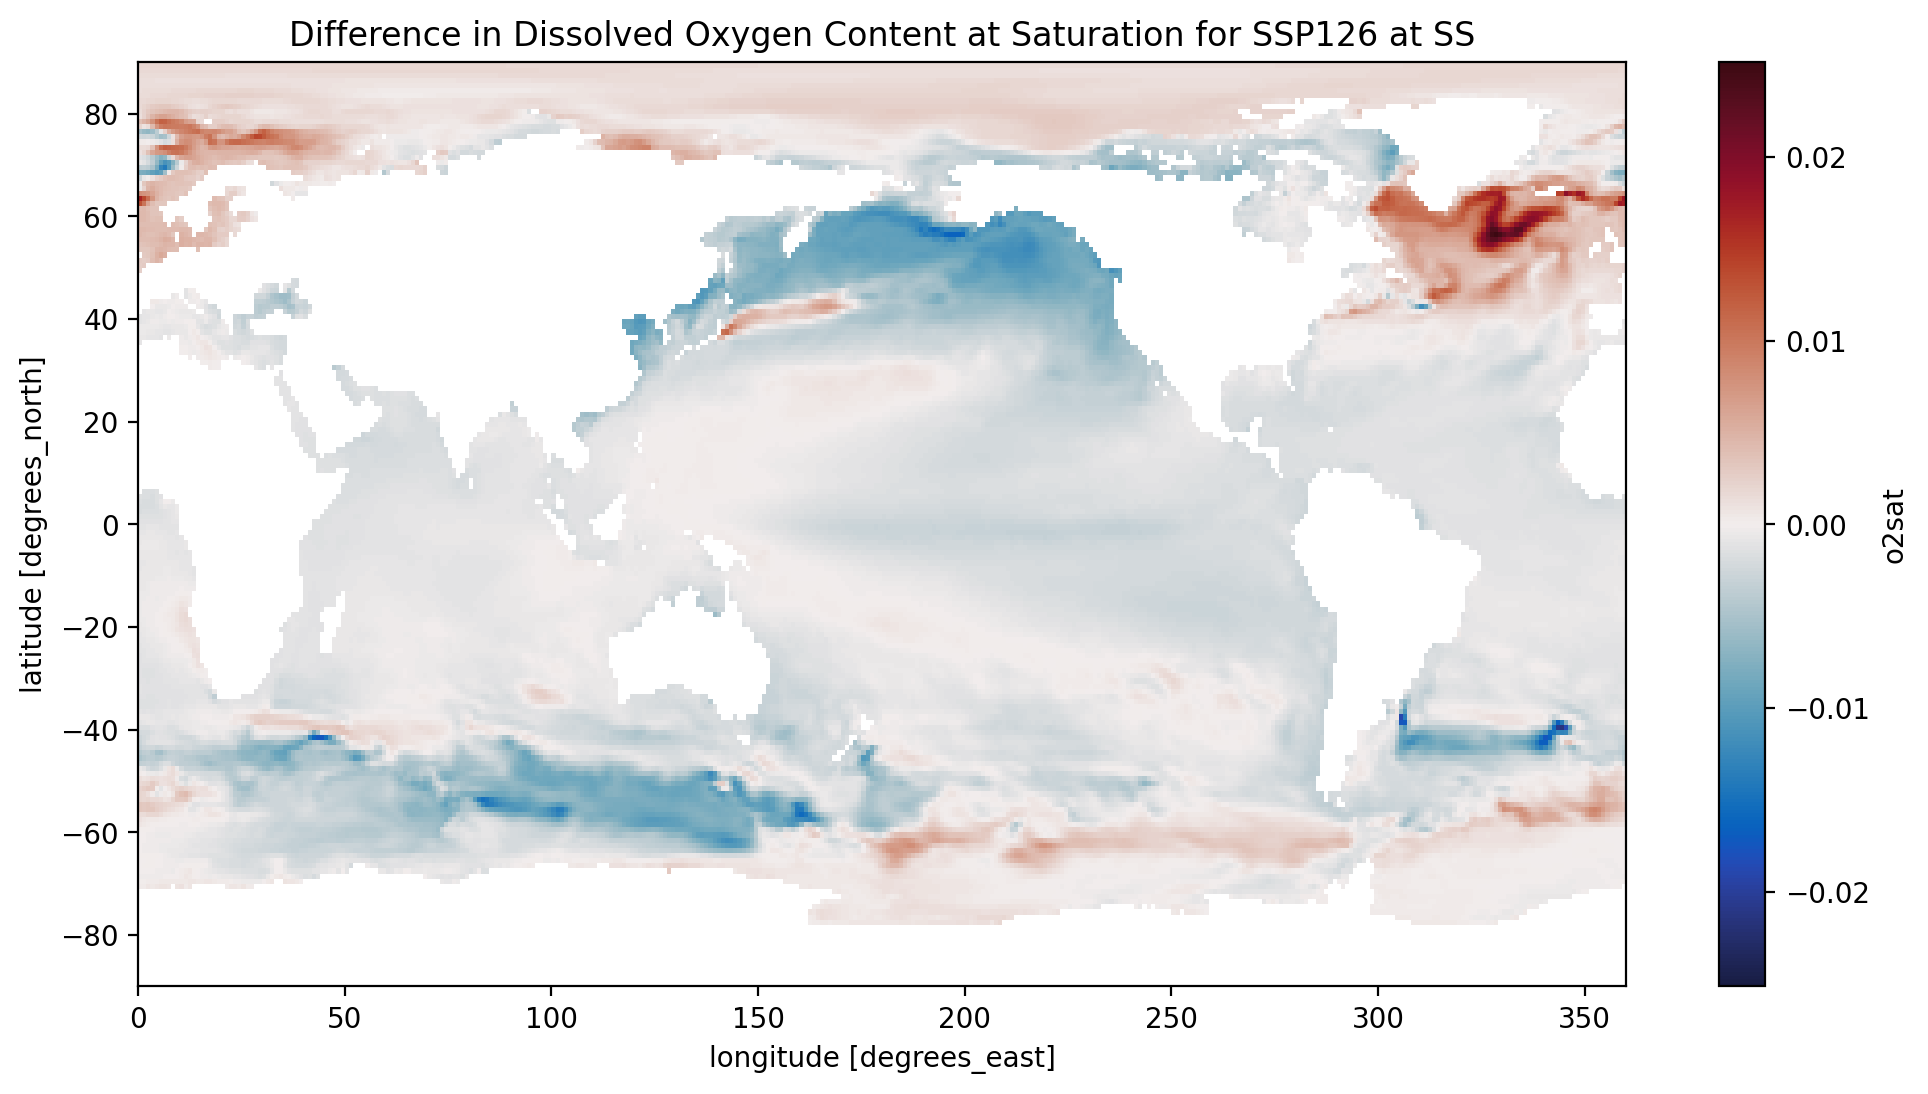

In [20]:
diff_126_O2S_Surface = diff_O2sat_SSP126.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Difference in Dissolved Oxygen Content at Saturation for SSP126 at SS')

Text(0.5, 1.0, 'Difference in Dissolved Oxygen Content at Saturation for SSP245 at SS')

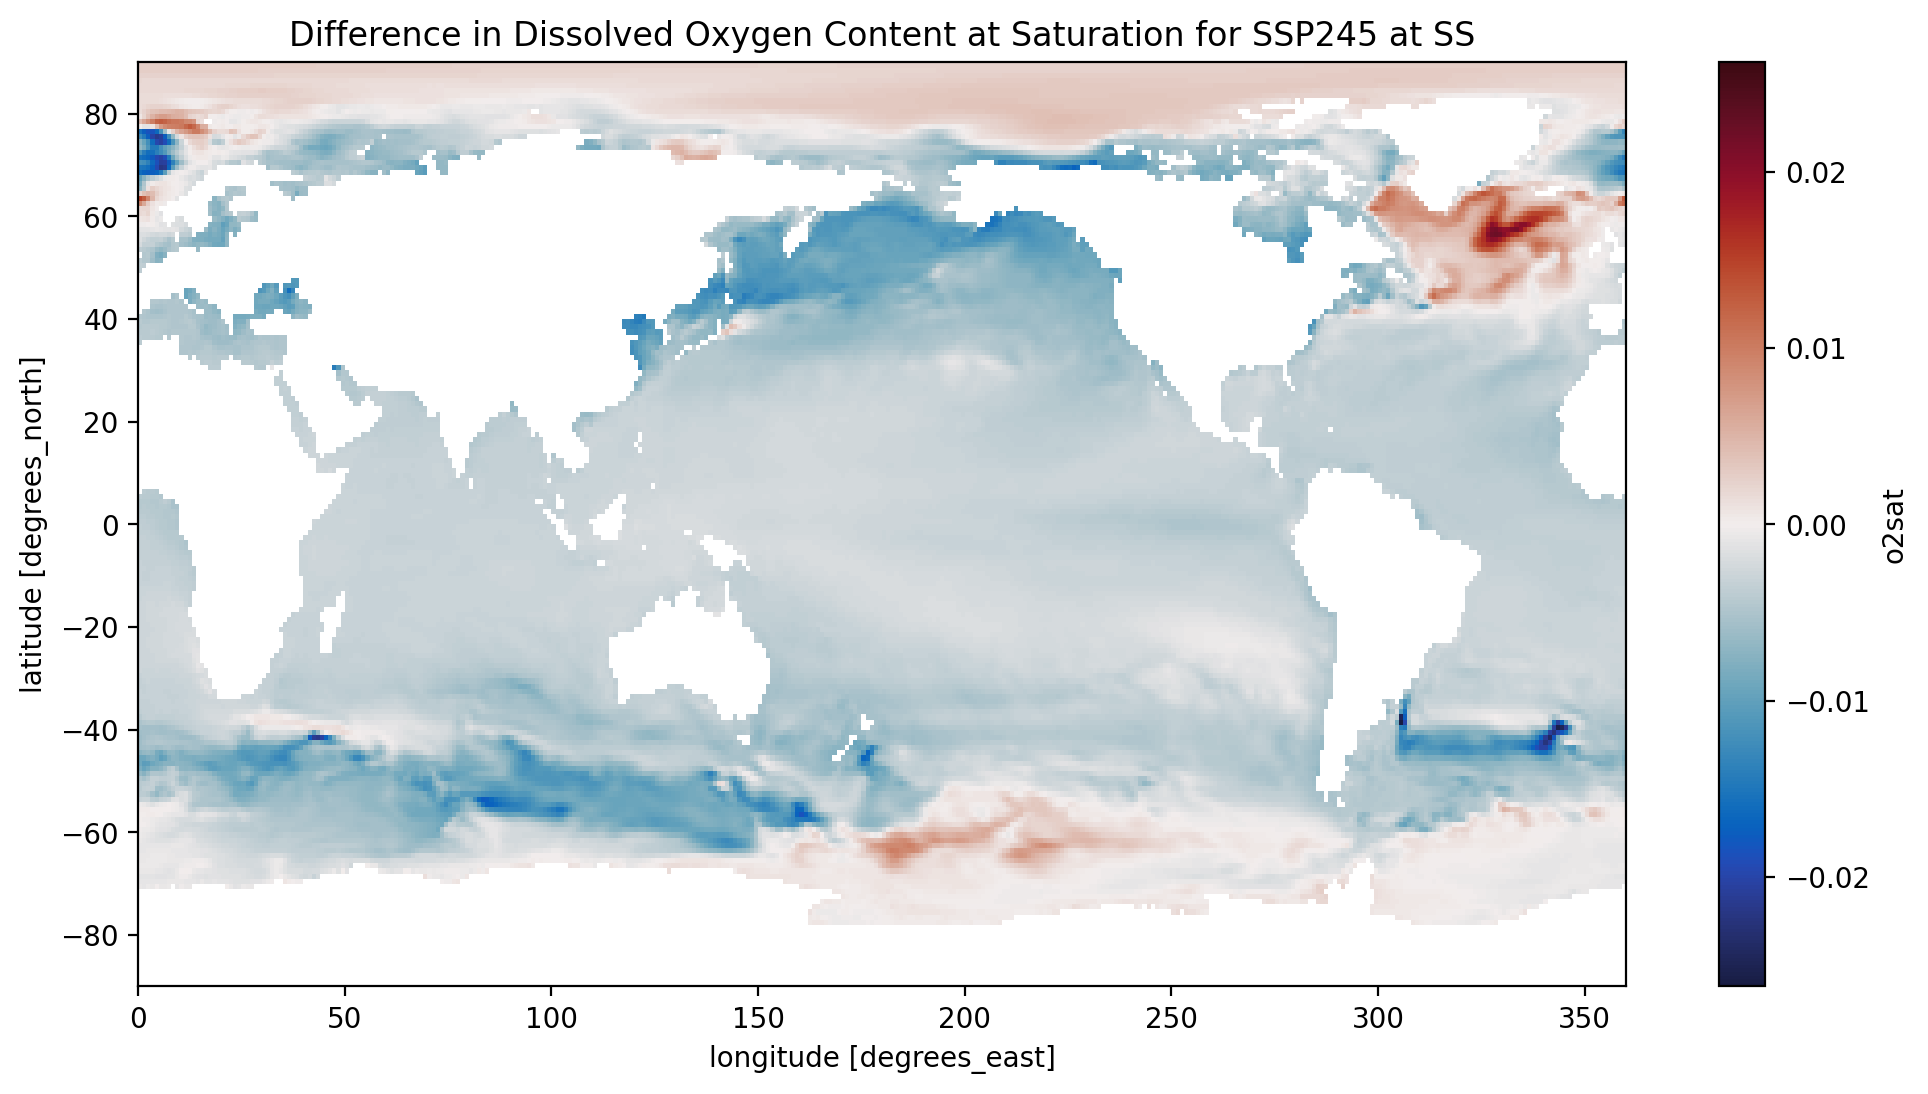

In [21]:
diff_245_O2S_Surface = diff_O2sat_SSP245.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Difference in Dissolved Oxygen Content at Saturation for SSP245 at SS')

Text(0.5, 1.0, 'Difference in Dissolved Oxygen Content at Saturation for SSP585 at SS')

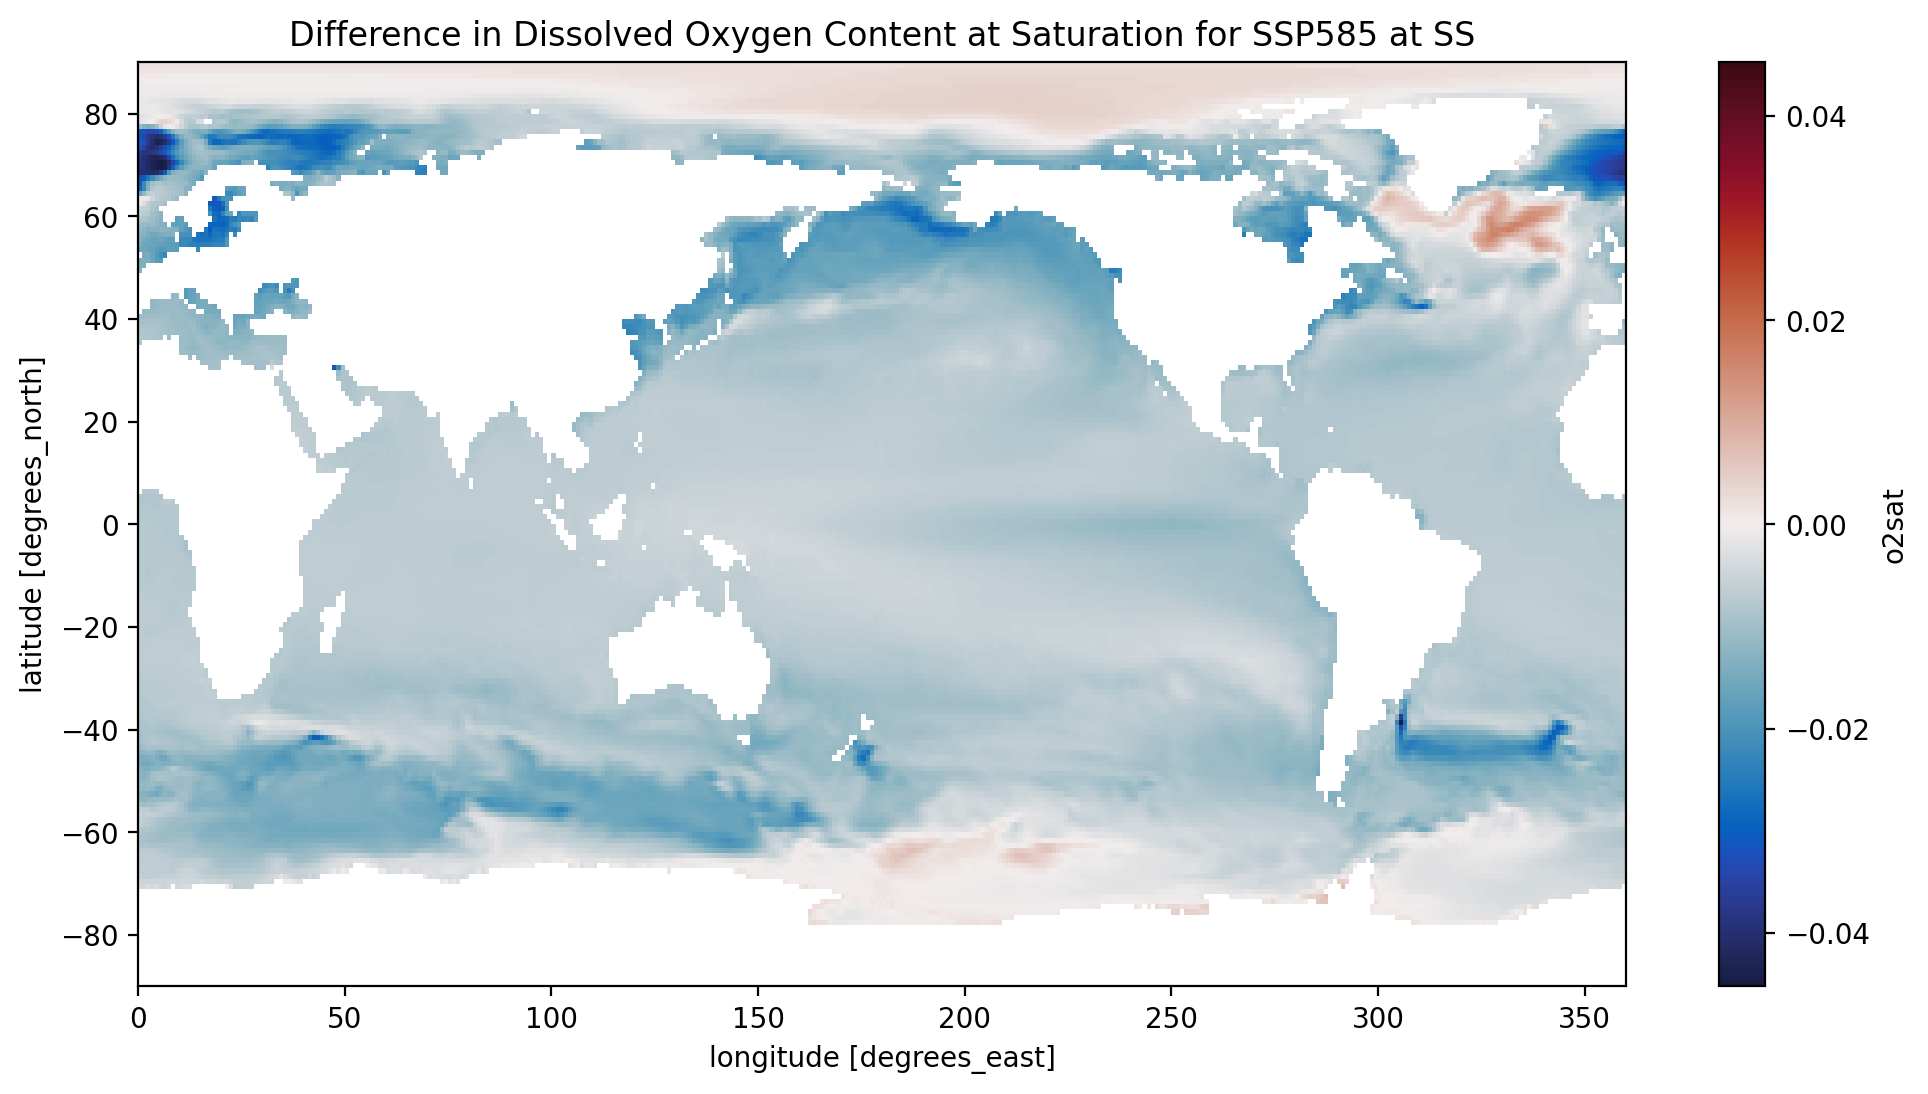

In [36]:
diff_585_O2S_Surface = diff_O2sat_SSP585.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Difference in Dissolved Oxygen Content at Saturation for SSP585 at SS')

Text(0.5, 1.0, 'Zonal Average of Dissolved Oxygen Content at Saturation for SSP126')

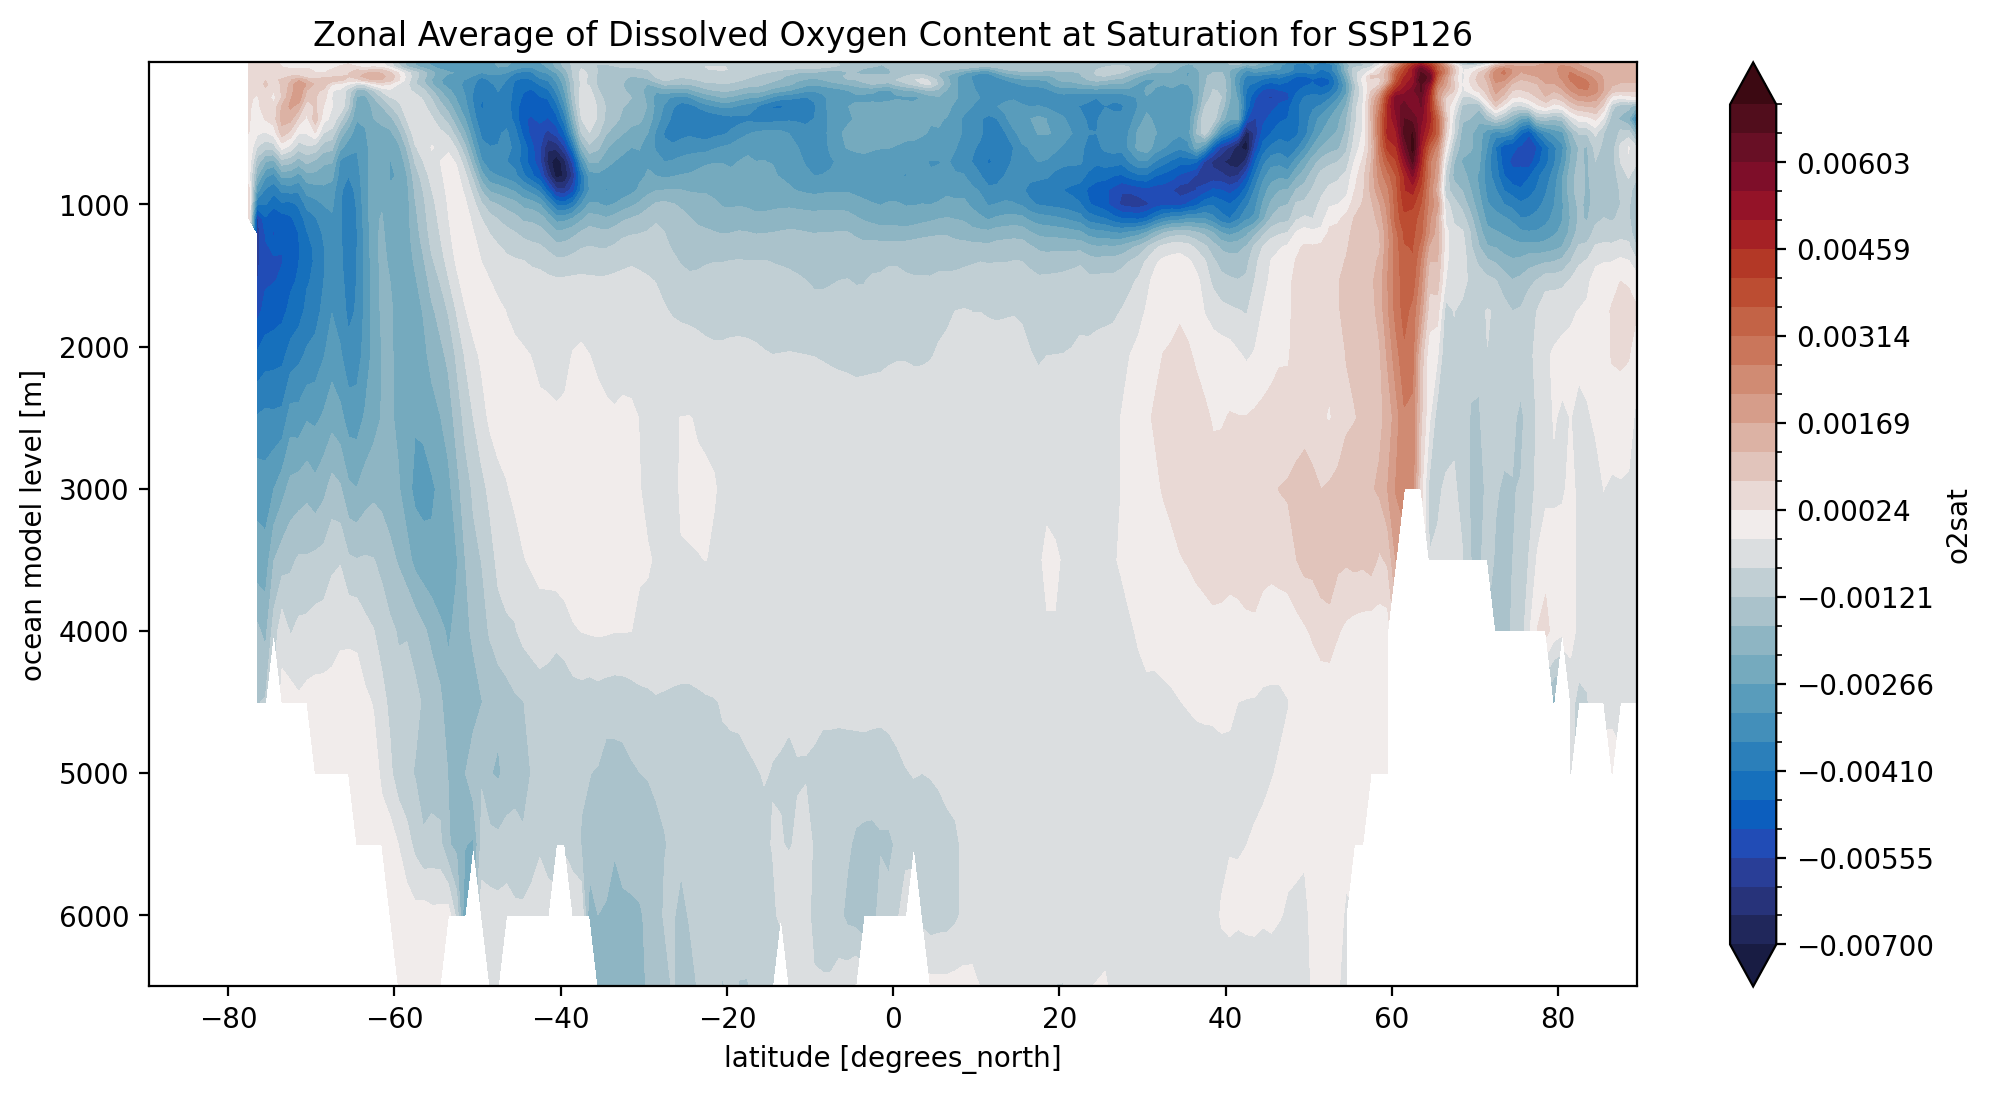

In [25]:
zd_126_02S= diff_O2sat_SSP126.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False,  vmin=-0.007,vmax=0.007, levels=30)
plt.title('Zonal Average of Dissolved Oxygen Content at Saturation for SSP126')

Text(0.5, 1.0, 'Zonal Average of Dissolved Oxygen Content at Saturation for SSP245')

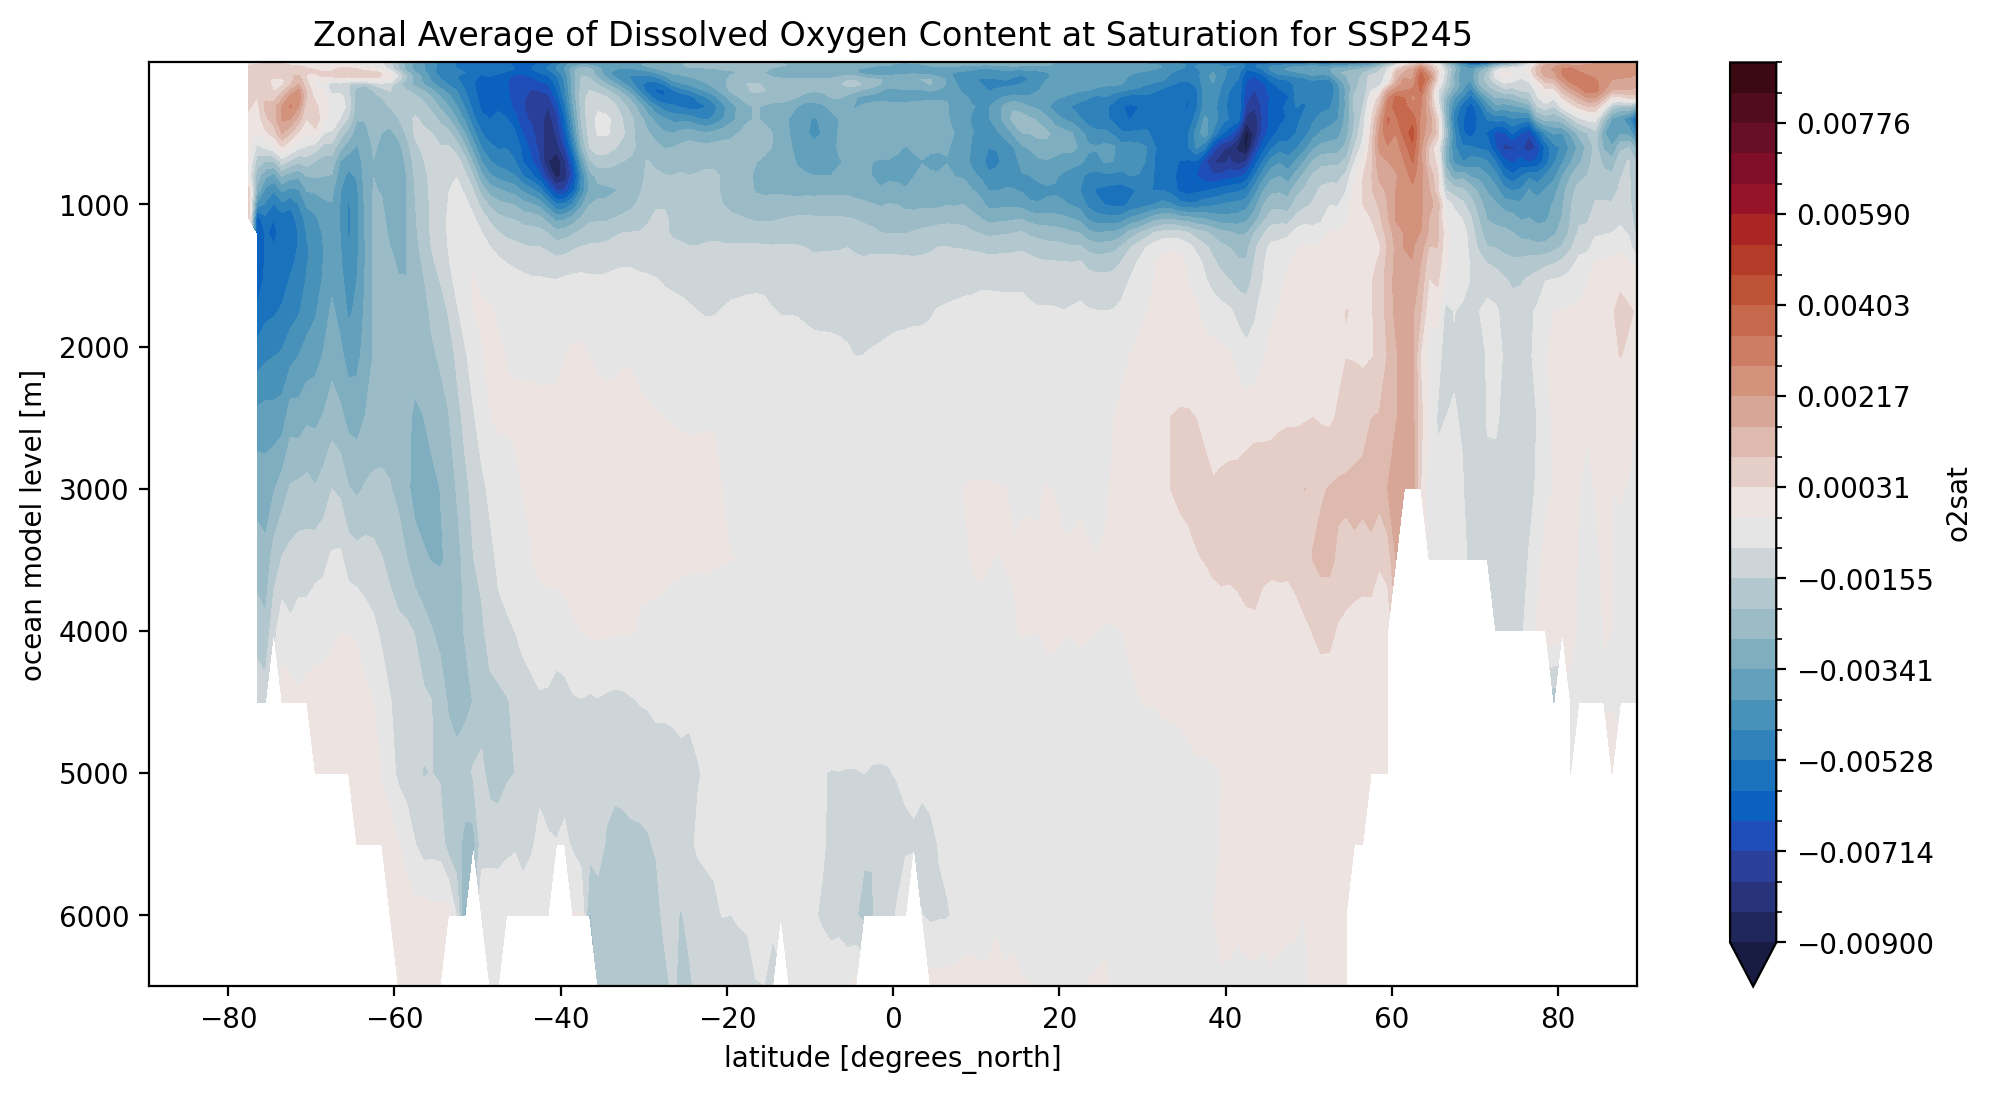

In [35]:
zd_245_02S= diff_O2sat_SSP245.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False,  vmin=-0.009,vmax=0.009,levels=30)
plt.title('Zonal Average of Dissolved Oxygen Content at Saturation for SSP245')

Text(0.5, 1.0, 'Zonal Average of Dissolved Oxygen Content at Saturation for SSP585')

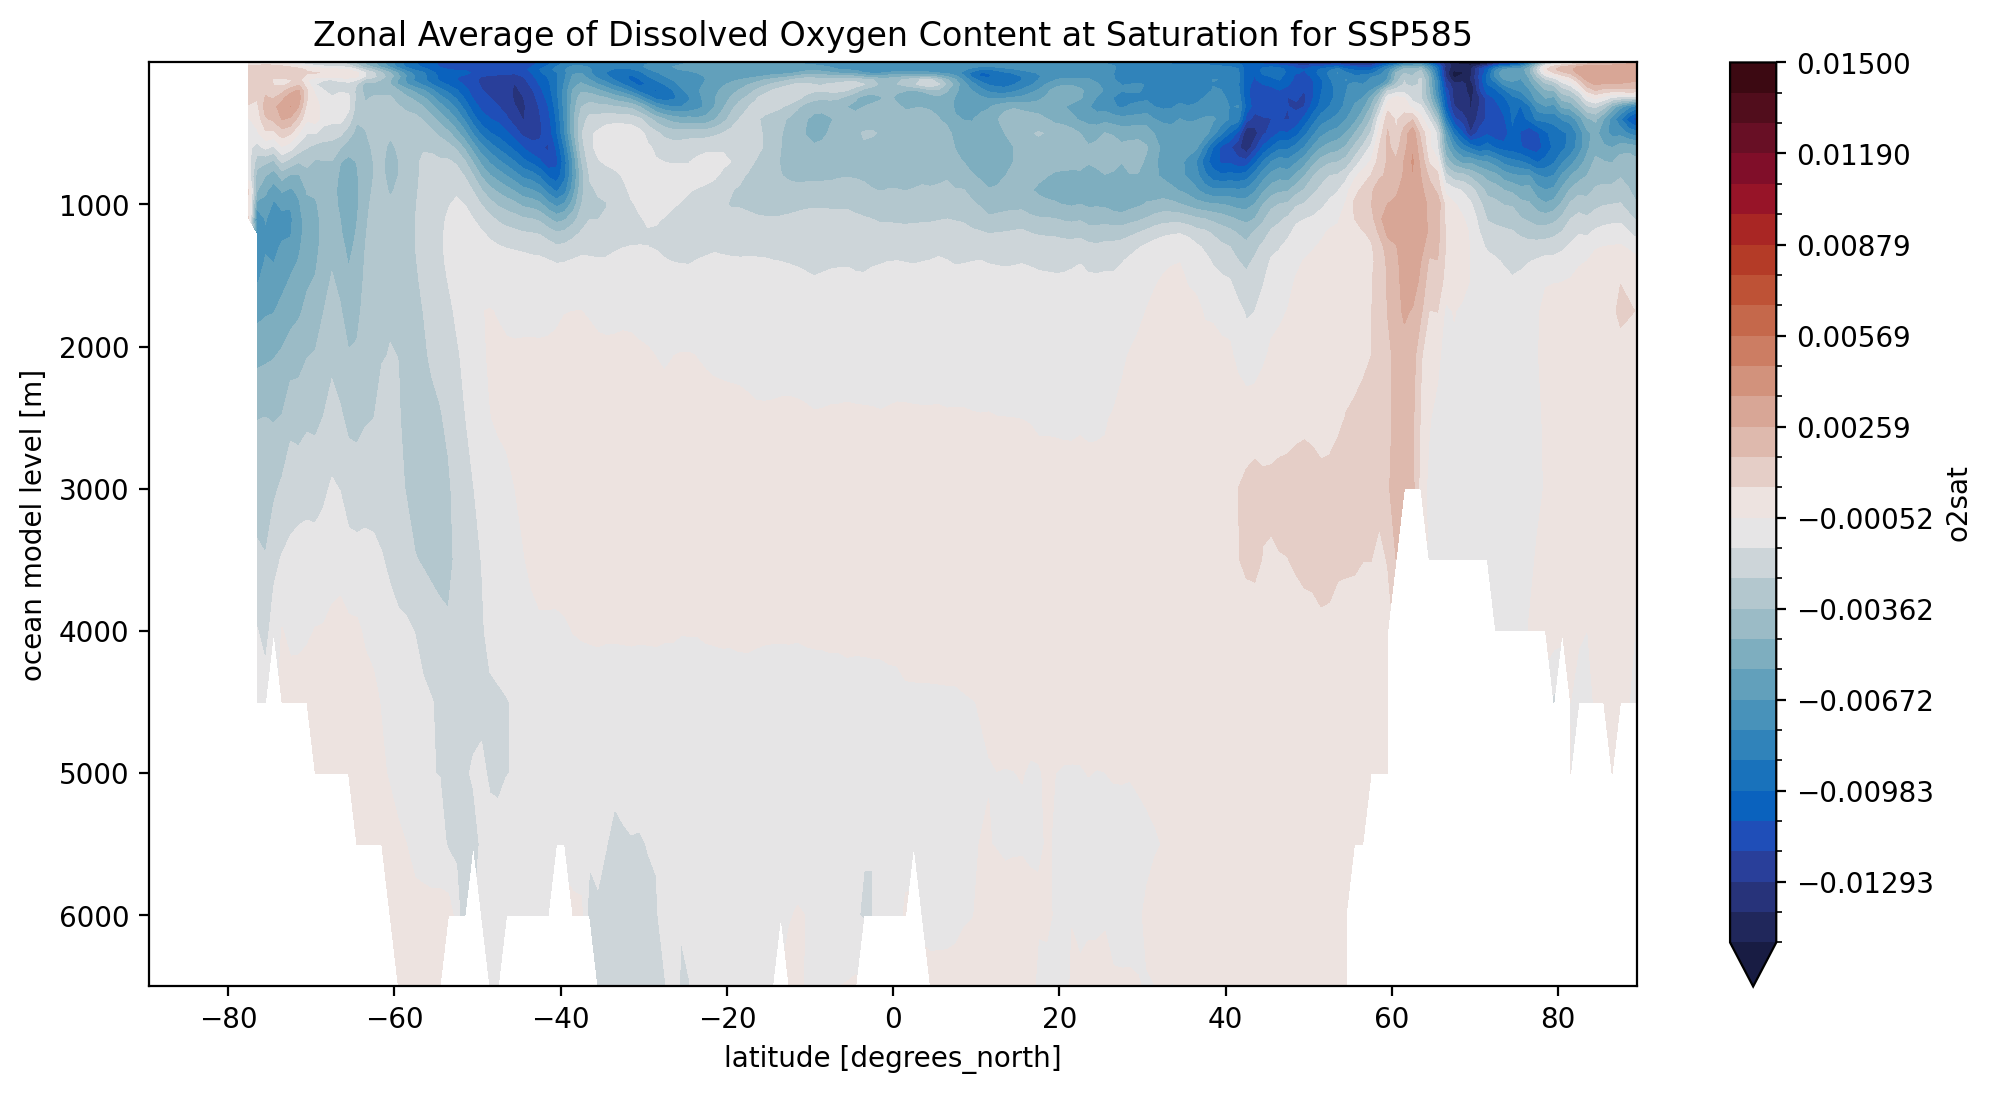

In [50]:
zd_585_02S= diff_O2sat_SSP585.mean(dim='lon').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False,  vmin=-0.015,vmax=0.015,  levels=30)
plt.title('Zonal Average of Dissolved Oxygen Content at Saturation for SSP585')

In [51]:
AOU_SSP126=O2_SSP126-O2_sat_SSP126
AOU_d126=(AOU_SSP126.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    AOU_SSP126.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

AttributeError: Rectangle.set() got an unexpected keyword argument 'lev'

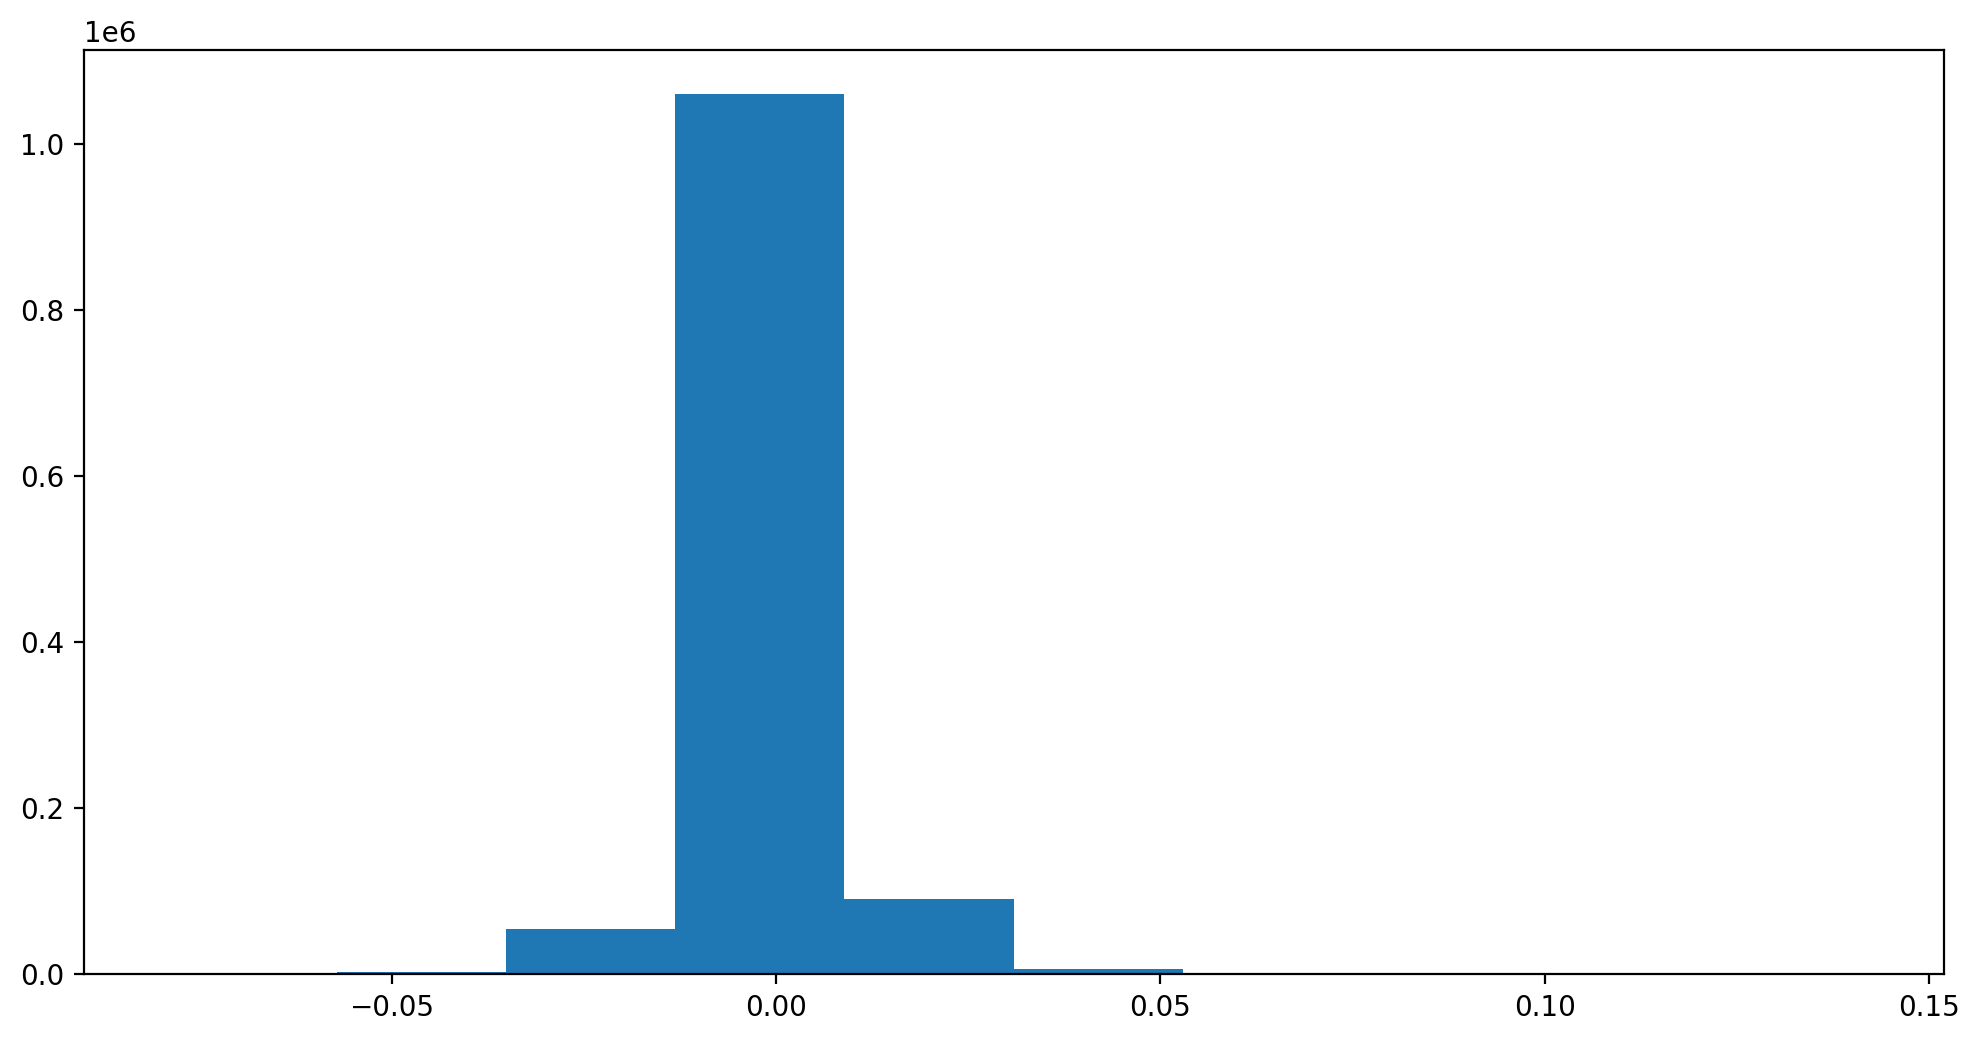

In [86]:
AOU_d126.plot(lev=0)

In [53]:
AOU_SSP126

<xarray.DataArray (time: 1032, lev: 35, lat: 180, lon: 360)>
dask.array<sub, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00

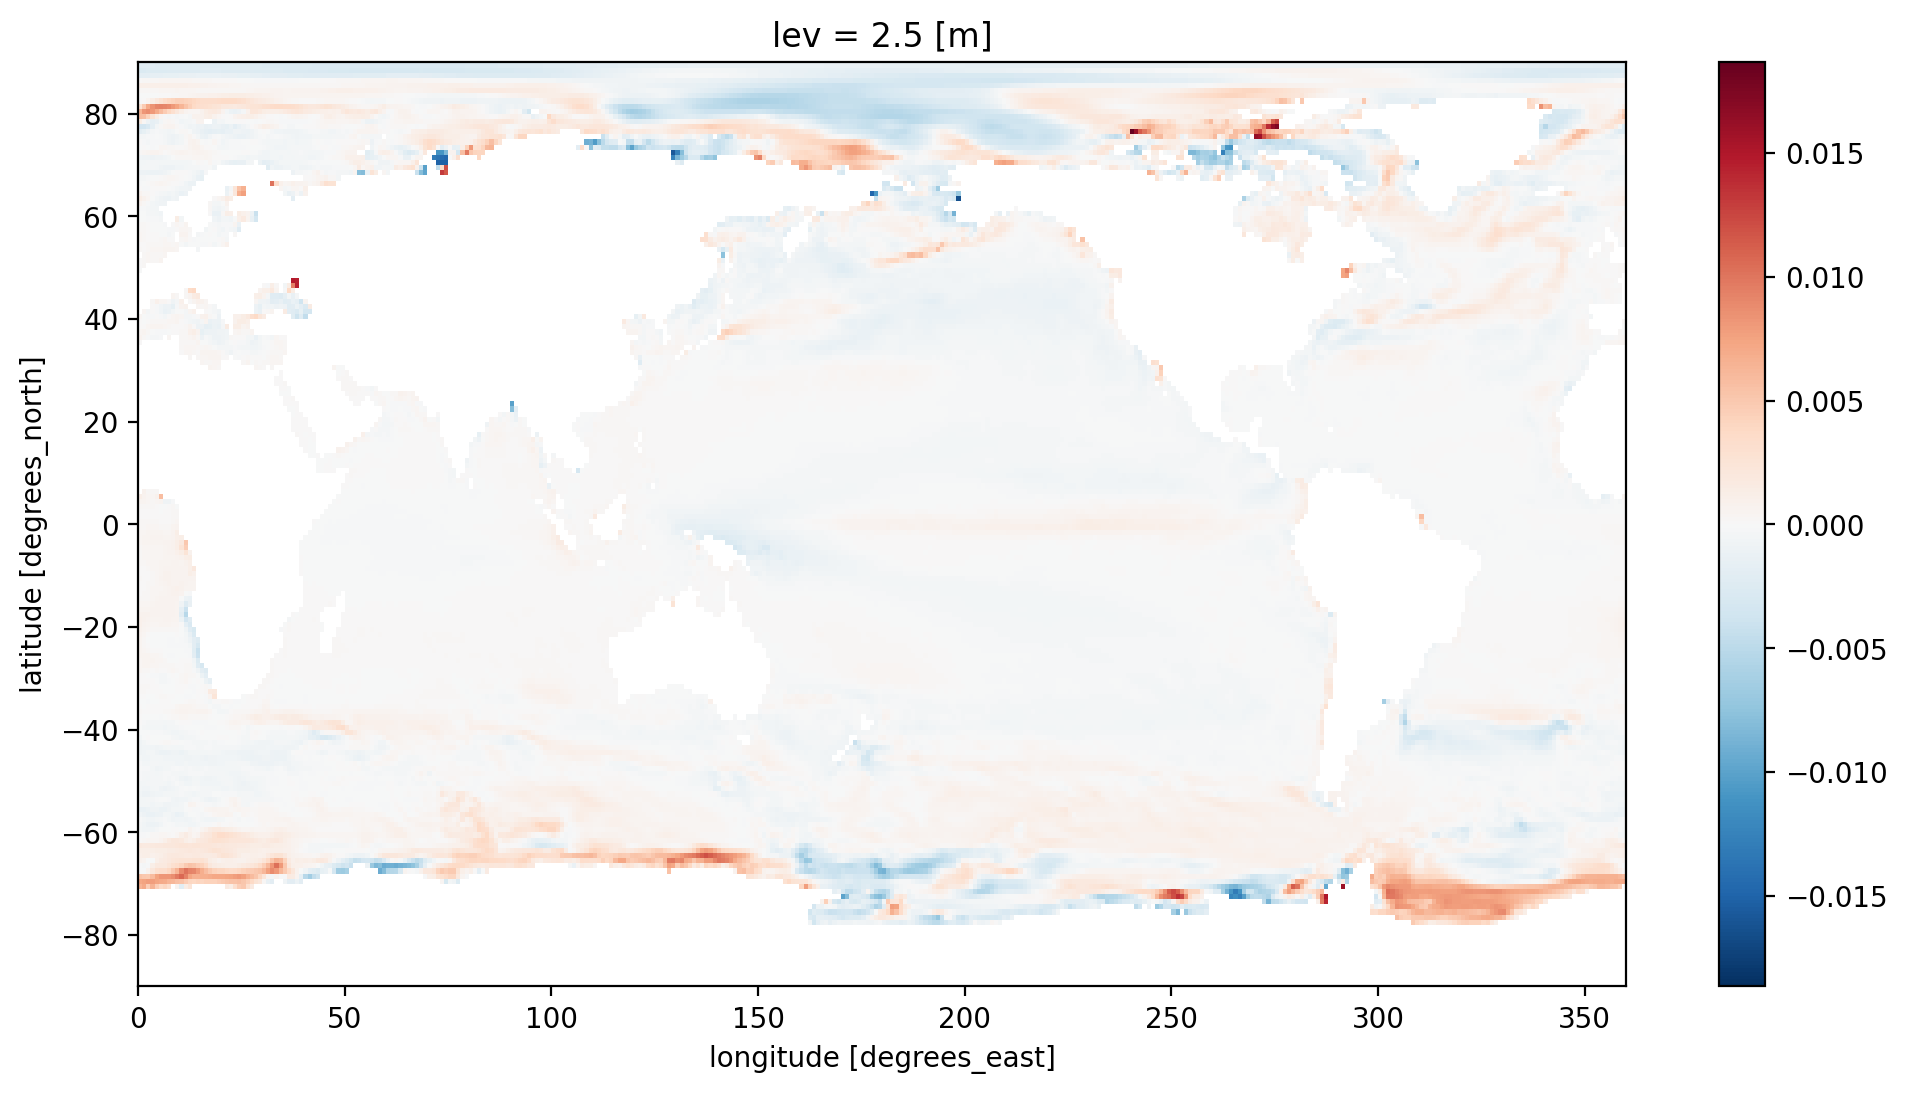

In [54]:
AOU_d126.isel(lev=0).plot()

In [55]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy
import cartopy.crs as ccrs
import cmocean 

In [56]:
woa18_basins = xr.open_dataset('../data/basins/woa18_basins_mask.nc',decode_times=False).mask

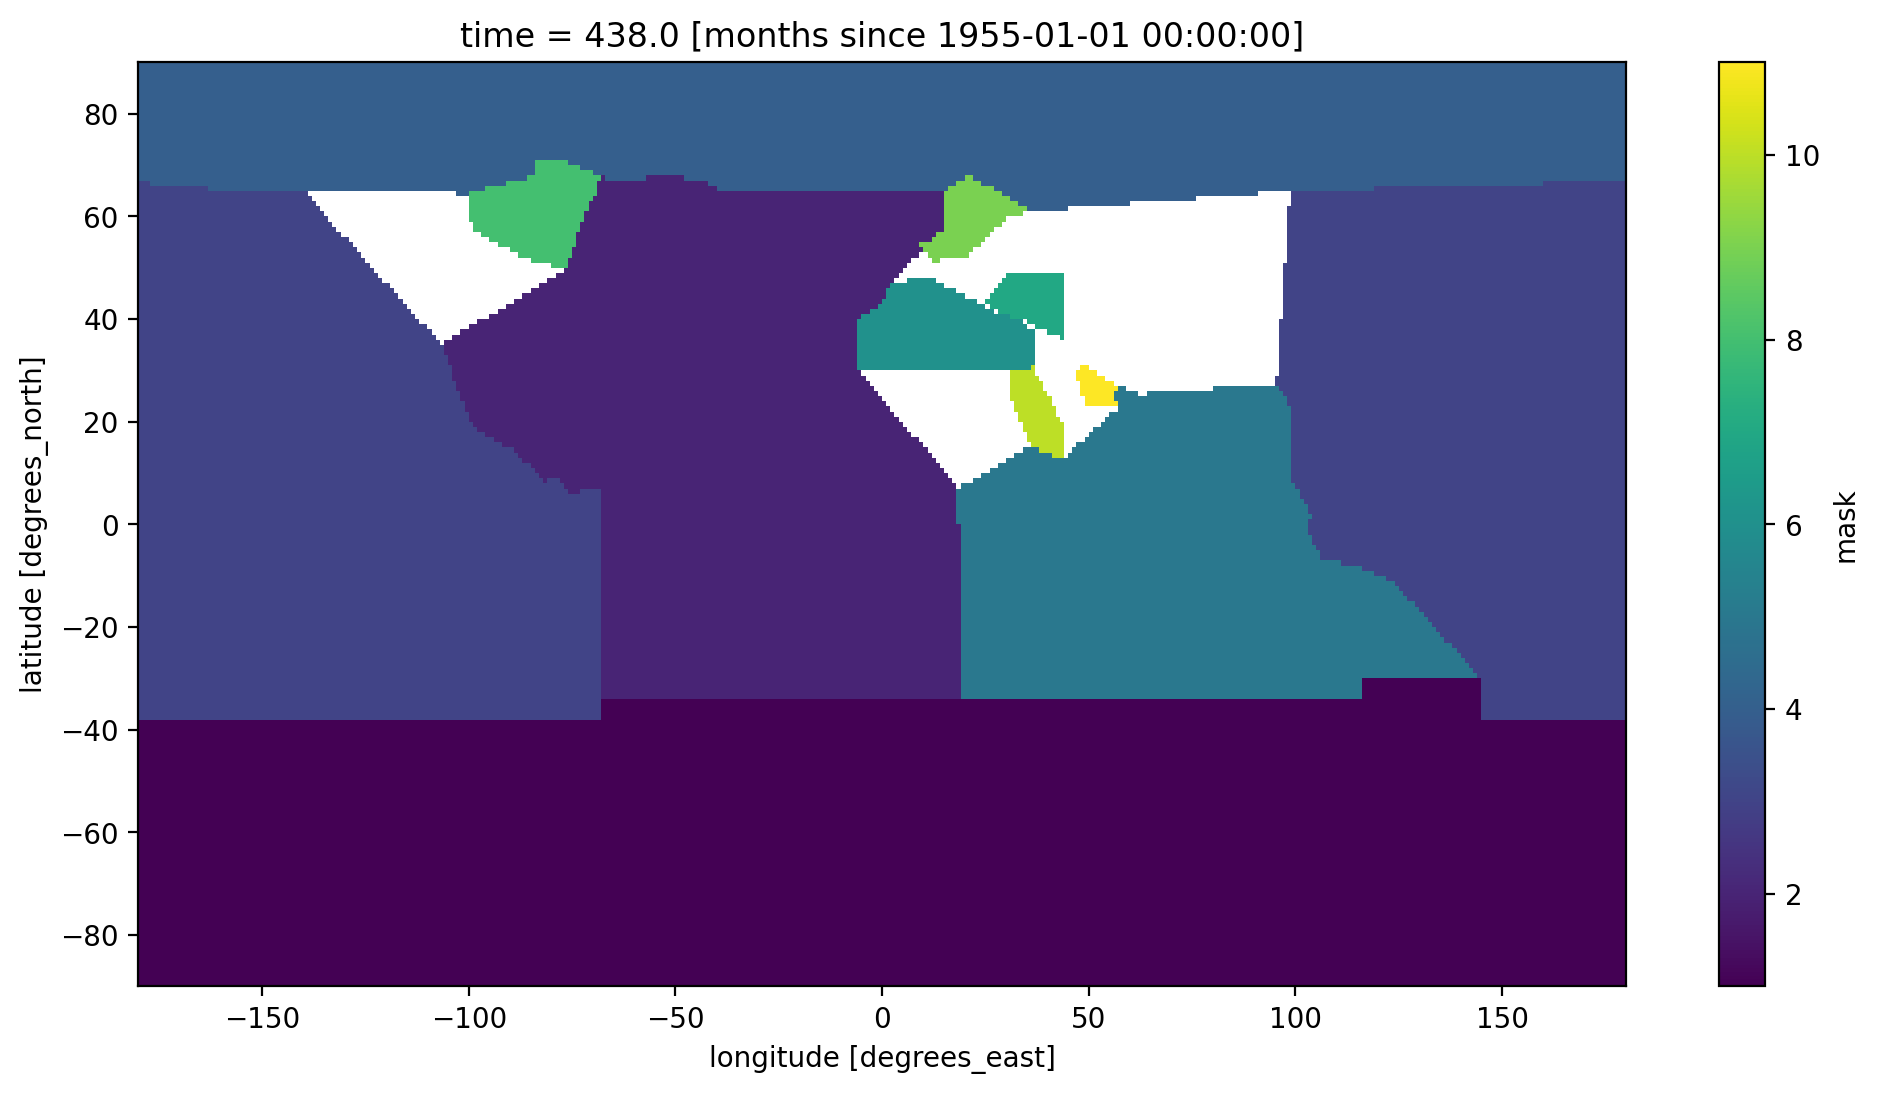

In [87]:
woa18_basins.plot()

Text(0.5, 1.0, 'Ocean Basin Mask')

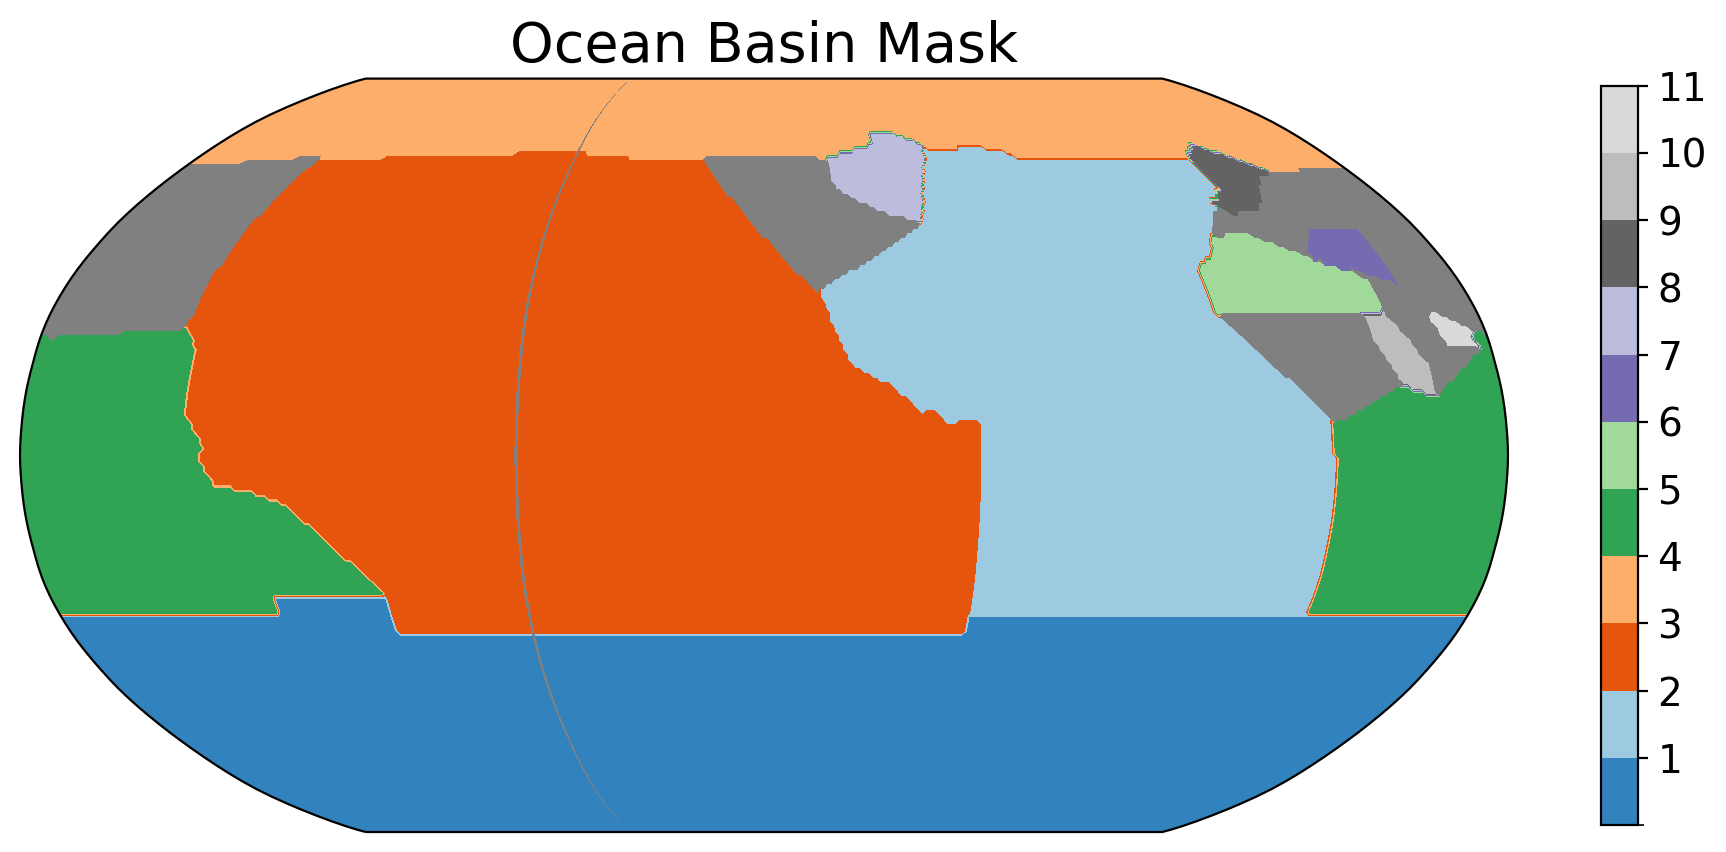

In [57]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_basins.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [80]:
AOU_d126

<xarray.DataArray (lev: 35, lat: 180, lon: 360)>
dask.array<sub, shape=(35, 180, 360), dtype=float32, chunksize=(35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5

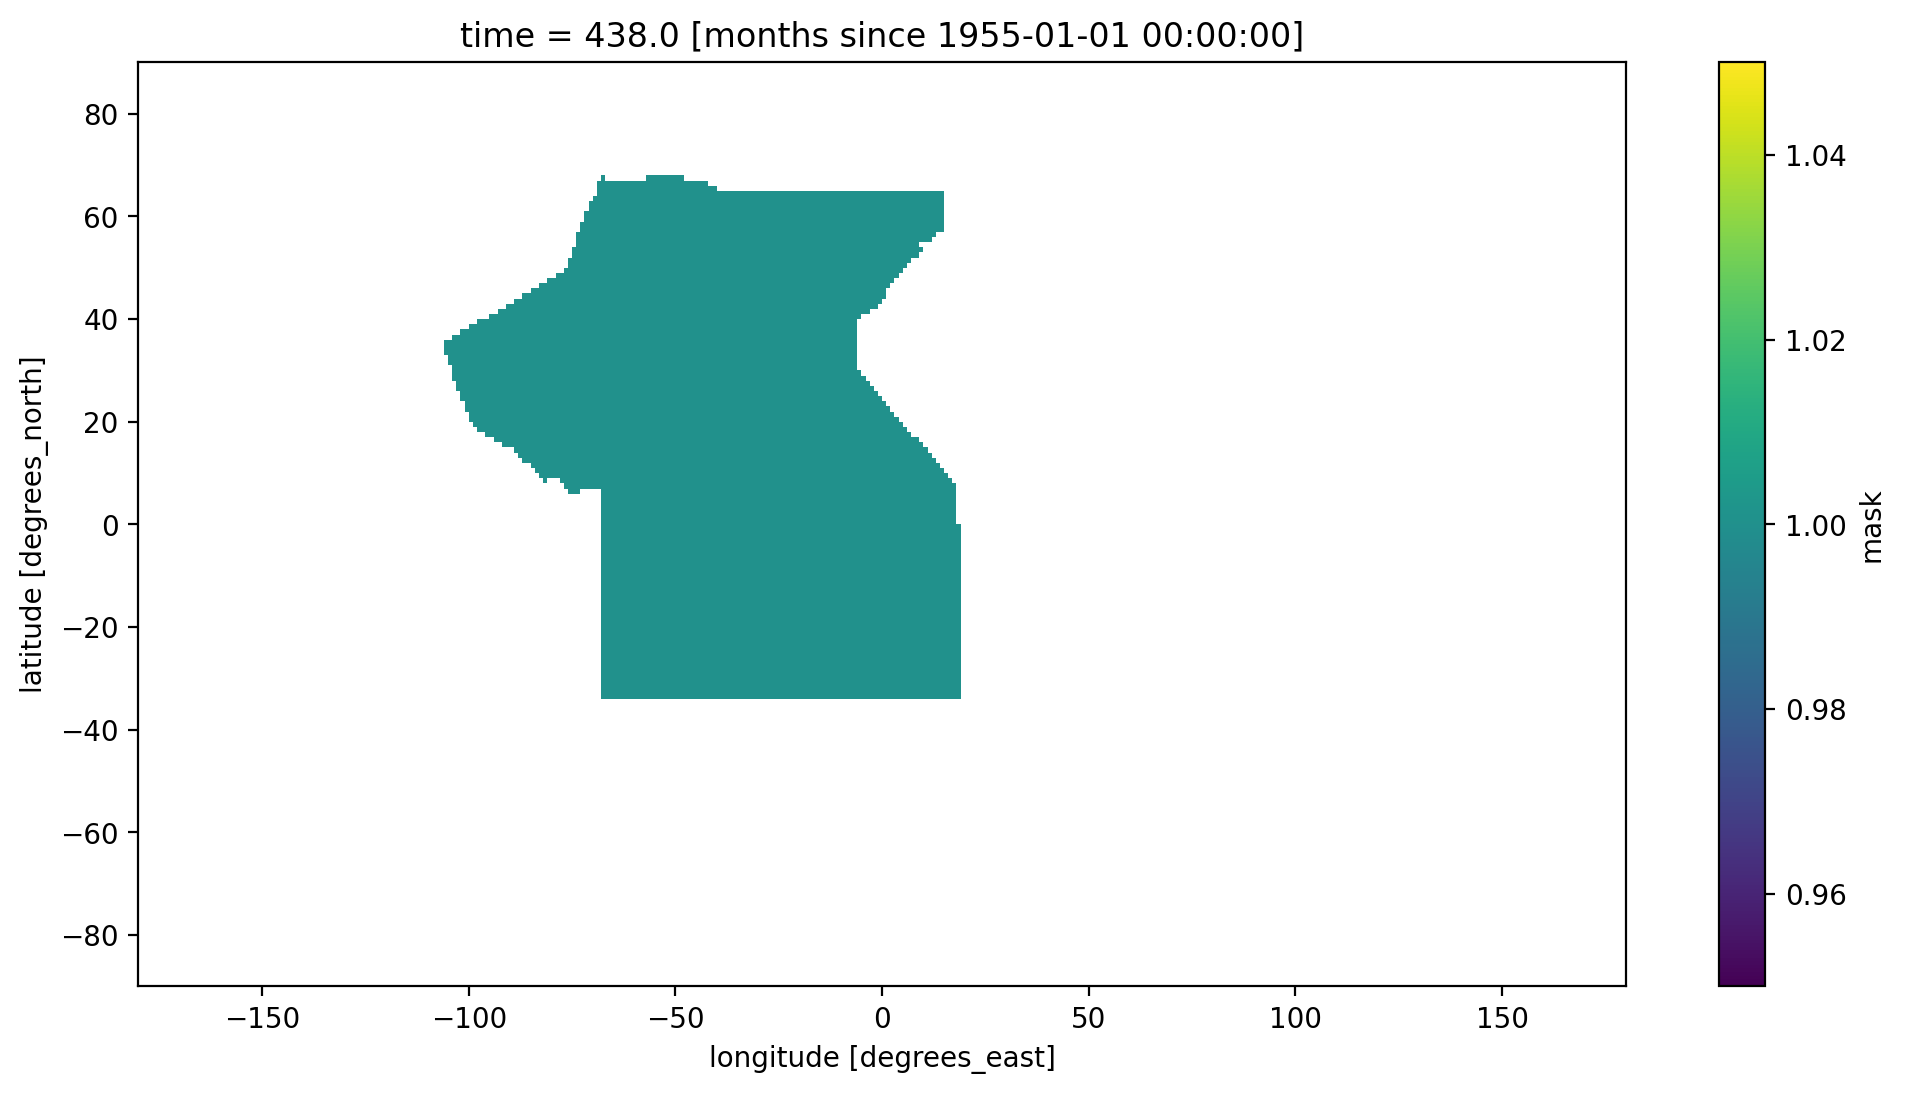

In [82]:
atlanticocean.plot()

TypeError: unsupported operand type(s) for *: 'Array' and 'QuadMesh'

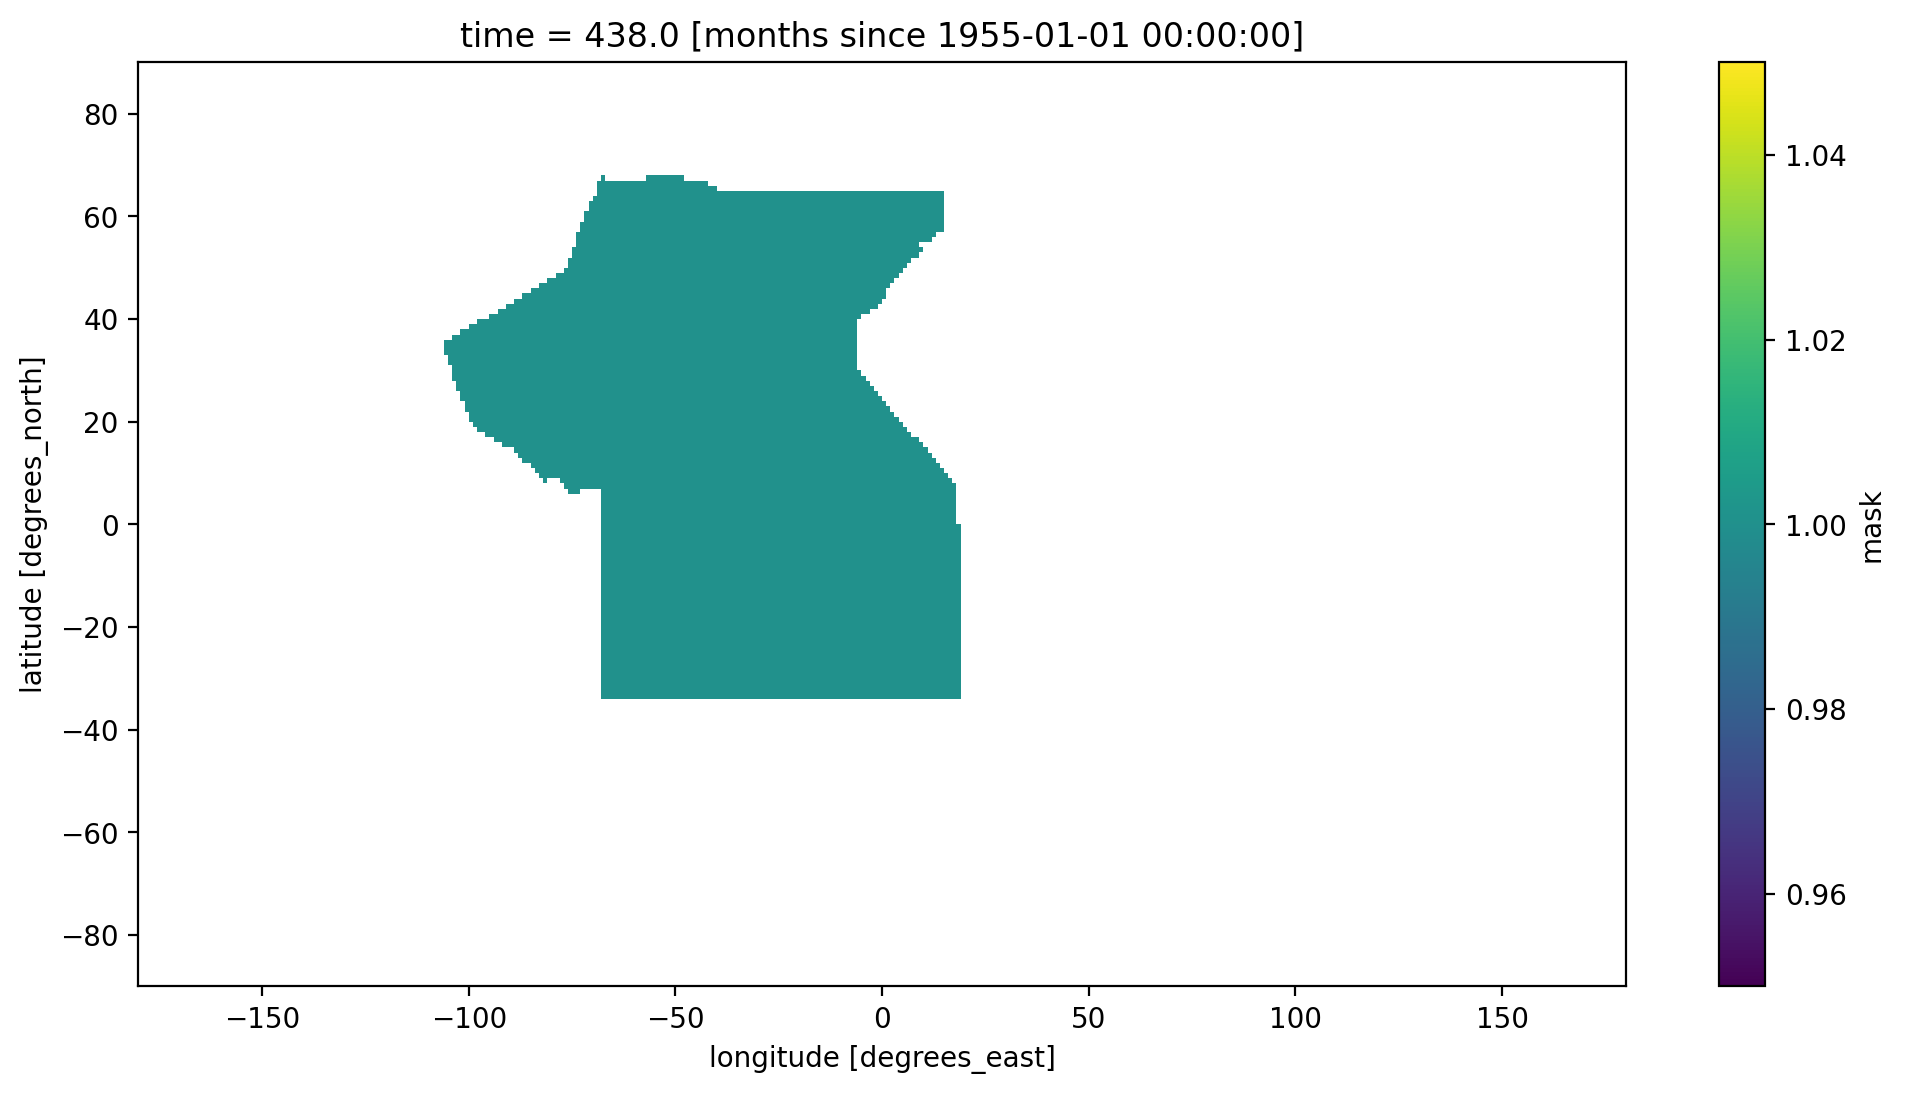

In [83]:
map =AOU_d126.isel(lev=0)*atlanticocean

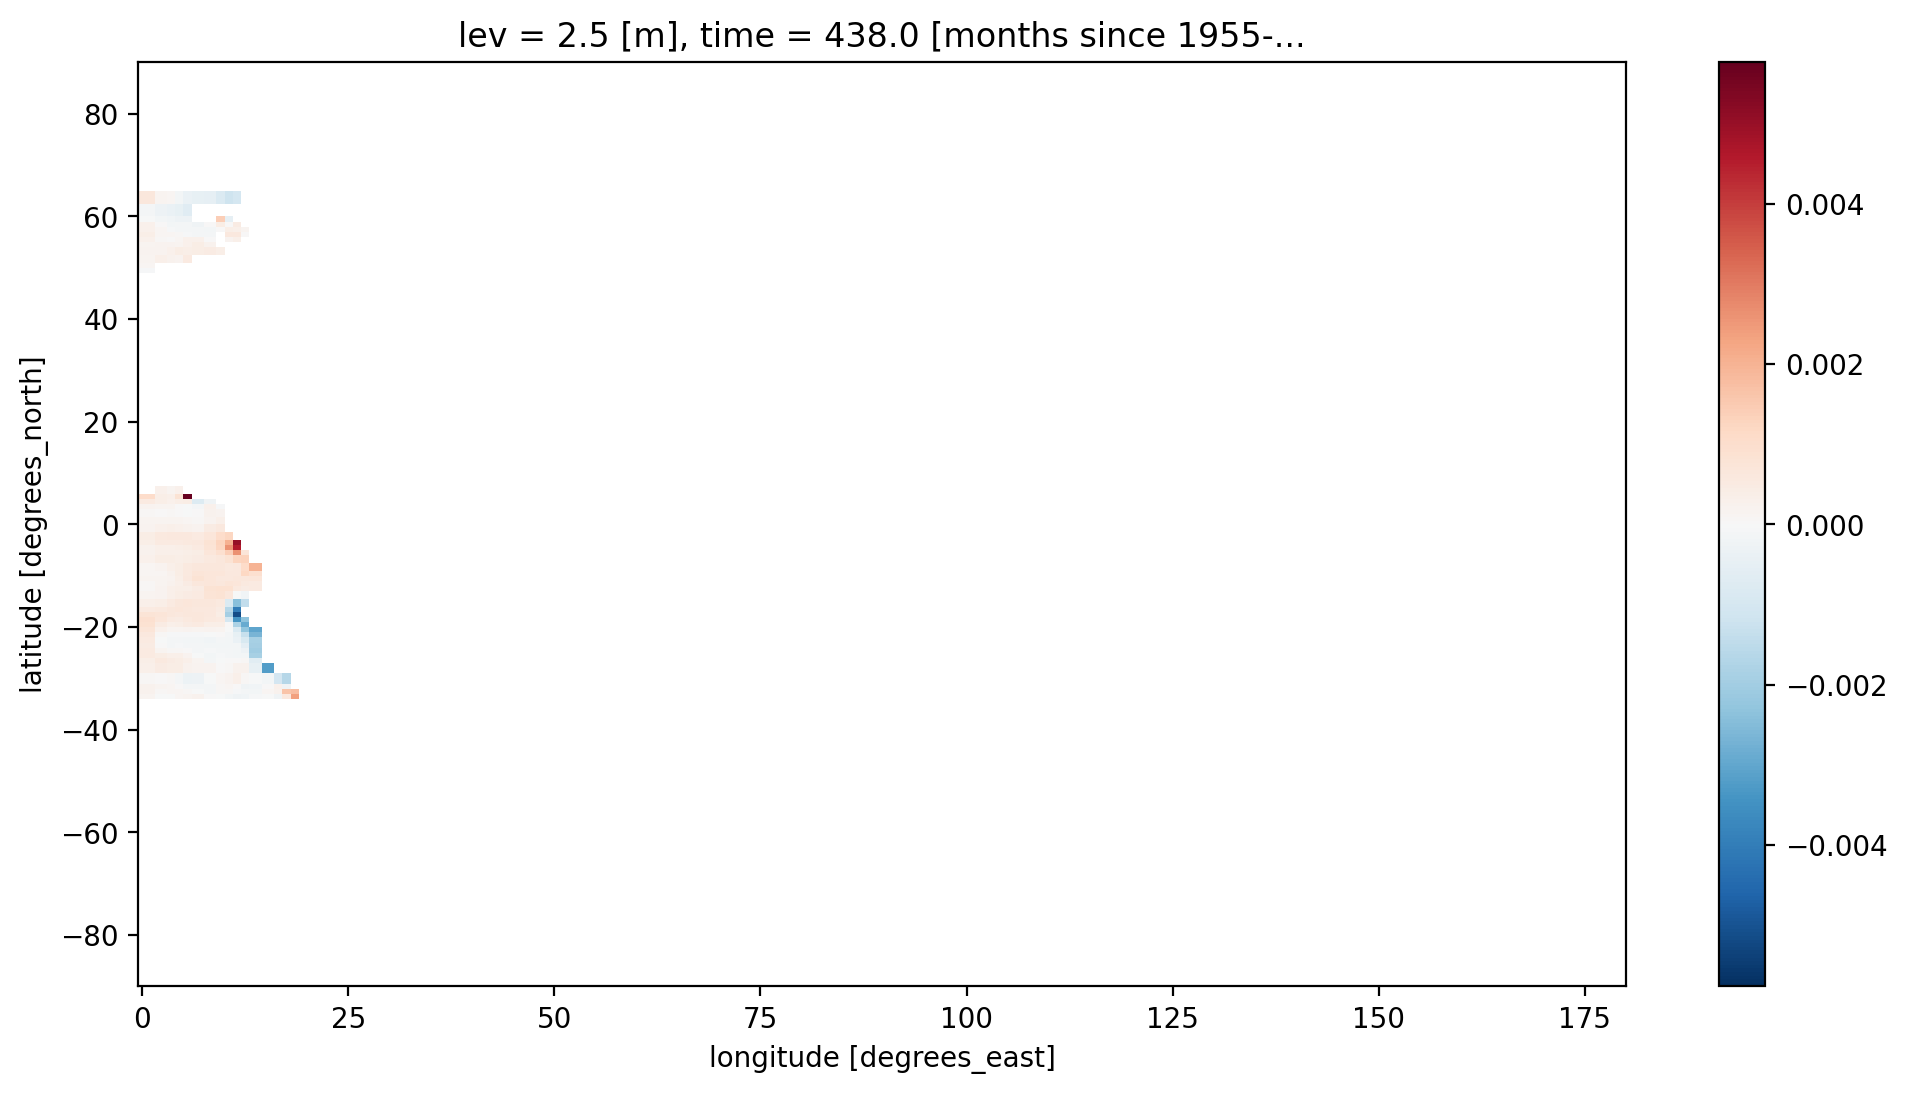

In [84]:
map.plot()

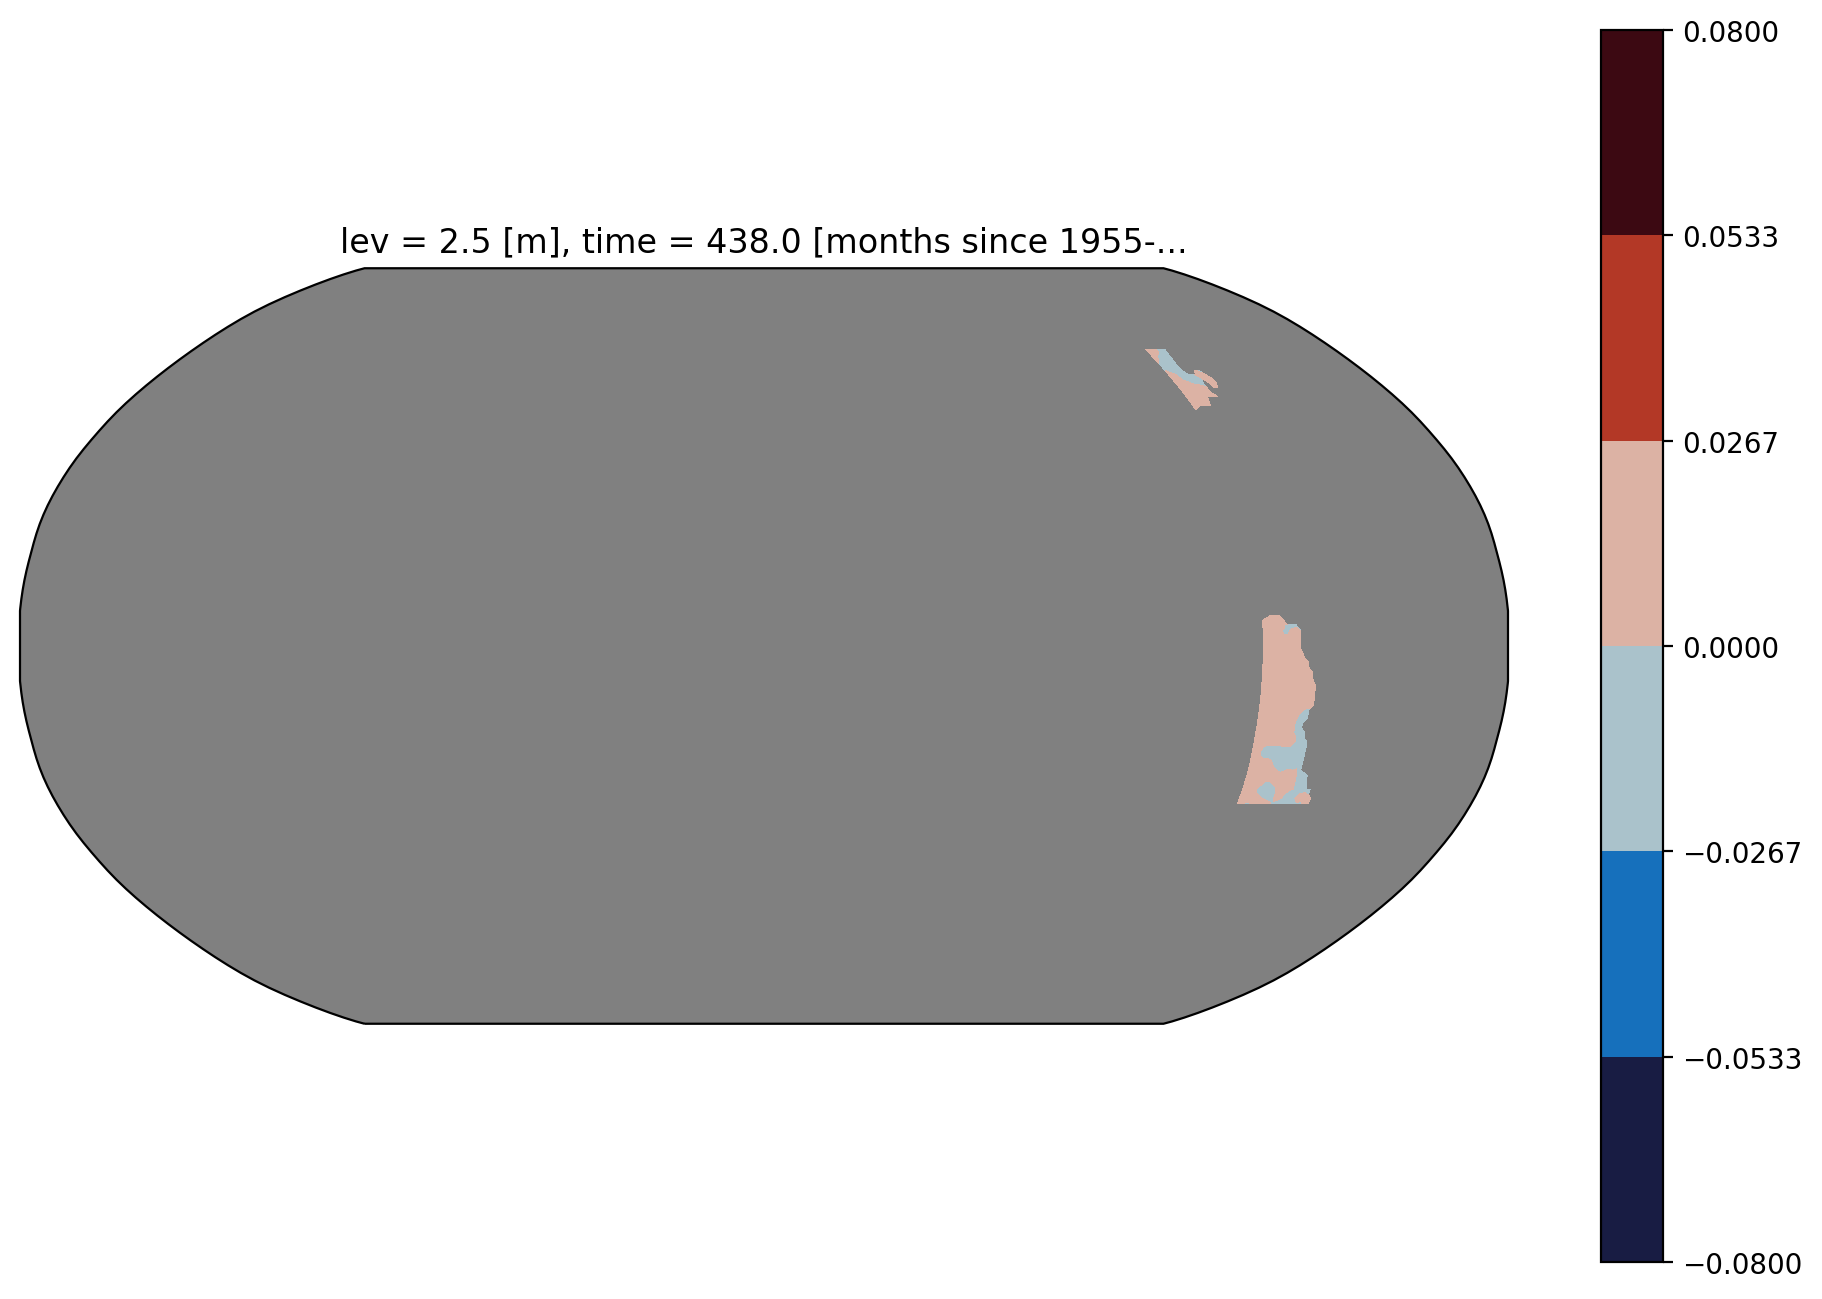

In [79]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = map.plot.contourf(x='lon',y='lat',
                      vmin=-0.08, vmax=0.08, 
                      cmap=cmocean.cm.balance,
                      subplot_kws = subplot_kws,
                      transform=ccrs.PlateCarree())

In [64]:
southernocean = (woa18_basins.where(woa18_basins==1) /  woa18_basins.where(woa18_basins==1)) ### Values 1 over atlantic, NaN elsewhere
atlanticocean = (woa18_basins.where(woa18_basins==2) / woa18_basins.where(woa18_basins==2)) ### Values 1 over atlantic, NaN elsewhere

### and so on for the other basins ..... work through the code above step by step
### to make sure you understand it.

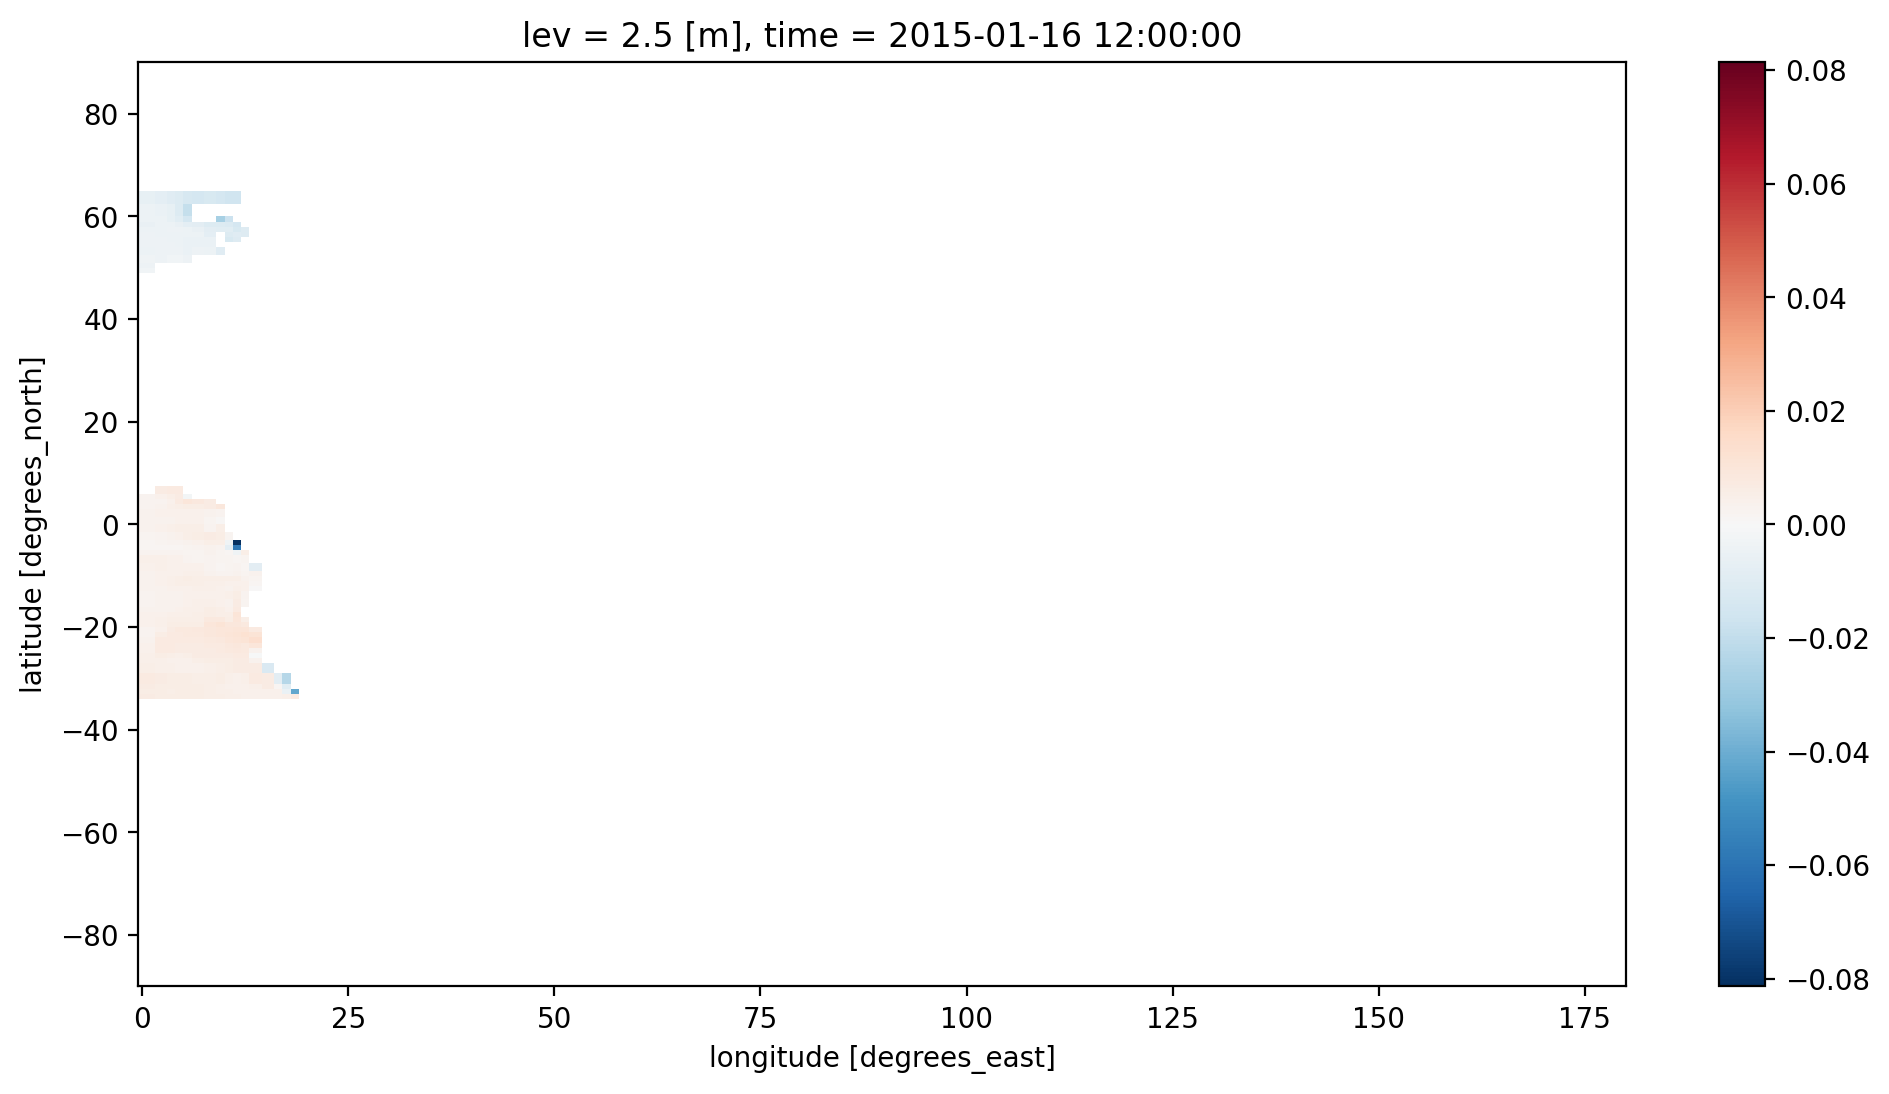

In [65]:
AOU_126_atlantic=AOU_SSP126*atlanticocean


In [60]:
AOU_126_atlantic

<xarray.DataArray (time: 1032, lev: 35, lat: 162, lon: 163)>
dask.array<mul, shape=(1032, 35, 162, 163), dtype=float64, chunksize=(13, 35, 162, 163), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * lon      (lon) float64 0.5 2.5 3.5 4.5 5.5 ... 175.5 176.5 177.5 178.5 179.5
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00